In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/GBP_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222666, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,1.32463,1.32463,1.32462,1.32466
2020-01-01 17:05:00,1.32465,1.32465,1.32462,1.32473
2020-01-01 17:10:00,1.32464,1.32469,1.32459,1.32476
2020-01-01 17:15:00,1.32469,1.32480,1.32459,1.32481
2020-01-01 17:20:00,1.32482,1.32466,1.32457,1.32482


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222665, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,1.32463,1.32463,1.32462,1.32466,1.32465,17,2,1,0.00000,1.324640,0.00004,1.324635
2020-01-01 17:05:00,1.32465,1.32465,1.32462,1.32473,1.32469,17,2,1,0.00000,1.324675,0.00011,1.324663
2020-01-01 17:10:00,1.32464,1.32469,1.32459,1.32476,1.32480,17,2,1,-0.00005,1.324675,0.00017,1.324670
2020-01-01 17:15:00,1.32469,1.32480,1.32459,1.32481,1.32466,17,2,1,-0.00011,1.324700,0.00022,1.324723
2020-01-01 17:20:00,1.32482,1.32466,1.32457,1.32482,1.32512,17,2,1,0.00016,1.324695,0.00025,1.324717


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,1.32463,1.32463,1.32462,1.32466,1.32465,17,2,1,0.00000,1.324640,0.00004,1.324635,-25.512976
2020-01-01 17:05:00,1.32465,1.32465,1.32462,1.32473,1.32469,17,2,1,0.00000,1.324675,0.00011,1.324663,-25.512684
2020-01-01 17:10:00,1.32464,1.32469,1.32459,1.32476,1.32480,17,2,1,-0.00005,1.324675,0.00017,1.324670,-25.512684
2020-01-01 17:15:00,1.32469,1.32480,1.32459,1.32481,1.32466,17,2,1,-0.00011,1.324700,0.00022,1.324723,-25.512642
2020-01-01 17:20:00,1.32482,1.32466,1.32457,1.32482,1.32512,17,2,1,0.00016,1.324695,0.00025,1.324717,-25.512684


In [ ]:
X = df.drop('close', axis=1)
X.head()

,open,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,1.32463,1.32462,1.32466,1.32465,17,2,1,0.00000,1.324640,0.00004,1.324635,-25.512976
2020-01-01 17:05:00,1.32465,1.32462,1.32473,1.32469,17,2,1,0.00000,1.324675,0.00011,1.324663,-25.512684
2020-01-01 17:10:00,1.32464,1.32459,1.32476,1.32480,17,2,1,-0.00005,1.324675,0.00017,1.324670,-25.512684
2020-01-01 17:15:00,1.32469,1.32459,1.32481,1.32466,17,2,1,-0.00011,1.324700,0.00022,1.324723,-25.512642
2020-01-01 17:20:00,1.32482,1.32457,1.32482,1.32512,17,2,1,0.00016,1.324695,0.00025,1.324717,-25.512684


In [ ]:
y=pd.DataFrame(df['close'])
y.head()

,close
timestamp,
2020-01-01 17:00:00,1.32463
2020-01-01 17:05:00,1.32465
2020-01-01 17:10:00,1.32469
2020-01-01 17:15:00,1.32480
2020-01-01 17:20:00,1.32466


In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_5Min(X,y)

178132
178132
22000
22000
22533
22533


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(178132, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(178107, 24, 12)
(21975, 24, 12)
(22508, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(178107, 1)
(21975, 1)
(22508, 1)


array([[0.6475849 ],
       [0.6488571 ],
       [0.64790297],
       ...,
       [0.39517307],
       [0.3953848 ],
       [0.39648008]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.6475849 , 0.6488571 , 0.64790297, ..., 0.39517307, 0.3953848 ,
       0.39648008], dtype=float32)

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          197632    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP15min_CNN_BiLSTM.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 276.2821 - mae: 2.3558 - mse: 276.2821 - root_mean_squared_error: 16.6217 - mape: 1507.0587
Epoch 1: val_mse improved from inf to 0.15964, saving model to /content/drive/MyDrive/modelweights/GBP15min_CNN_BiLSTM.hdf5
463/463 [==============================] - 360s 753ms/step - loss: 276.2821 - mae: 2.3558 - mse: 276.2821 - root_mean_squared_error: 16.6217 - mape: 1507.0587 - val_loss: 0.1596 - val_mae: 0.3415 - val_mse: 0.1596 - val_root_mean_squared_error: 0.3996 - val_mape: 11223.3057
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.1348 - mae: 0.3176 - mse: 0.1348 - root_mean_squared_error: 0.3672 - mape: 2666.1426
Epoch 2: val_mse improved from 0.15964 to 0.05873, saving model to /content/drive/MyDrive/modelweights/GBP15min_CNN_BiLSTM.hdf5
463/463 [==============================] - 324s 700ms/step - loss: 0.1348 - mae: 0.3176 - mse: 0.1348 - root_mean_squared_error: 0.3672 - mape: 2666.1426 

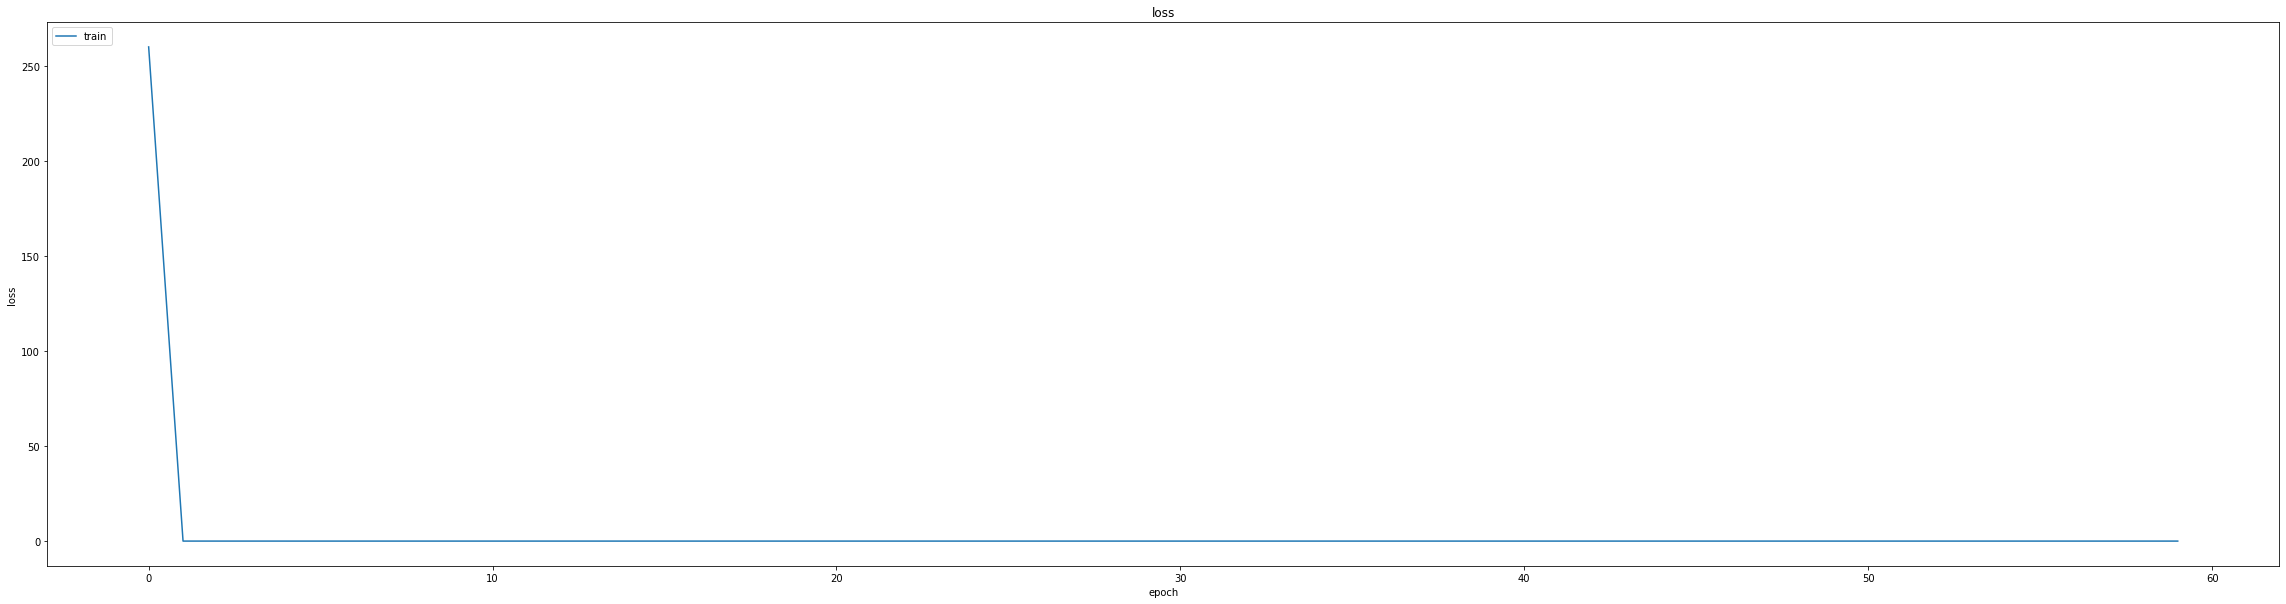

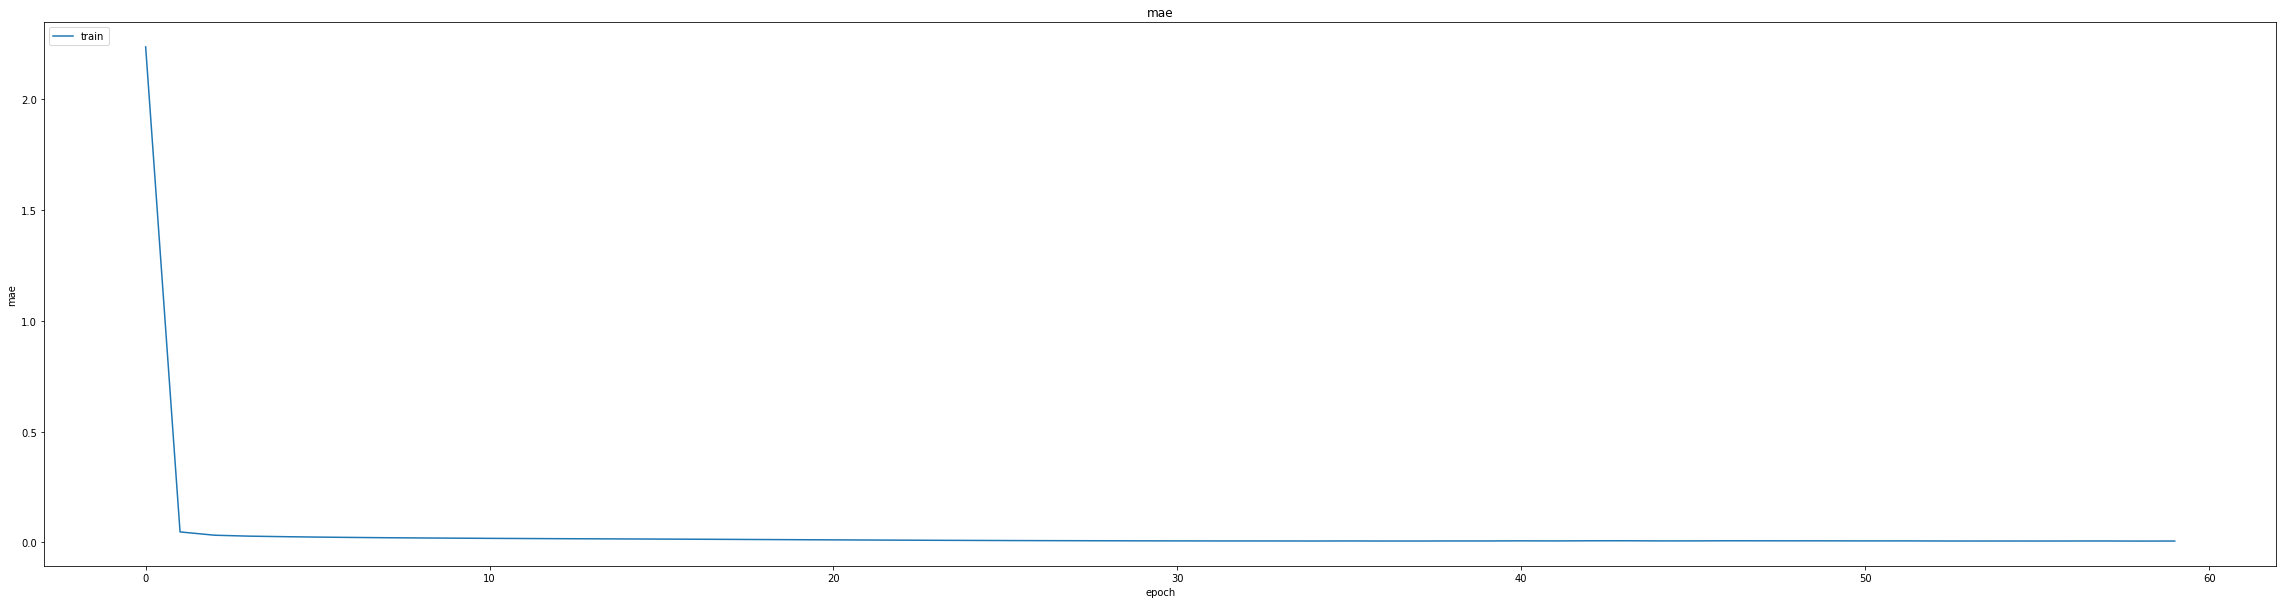

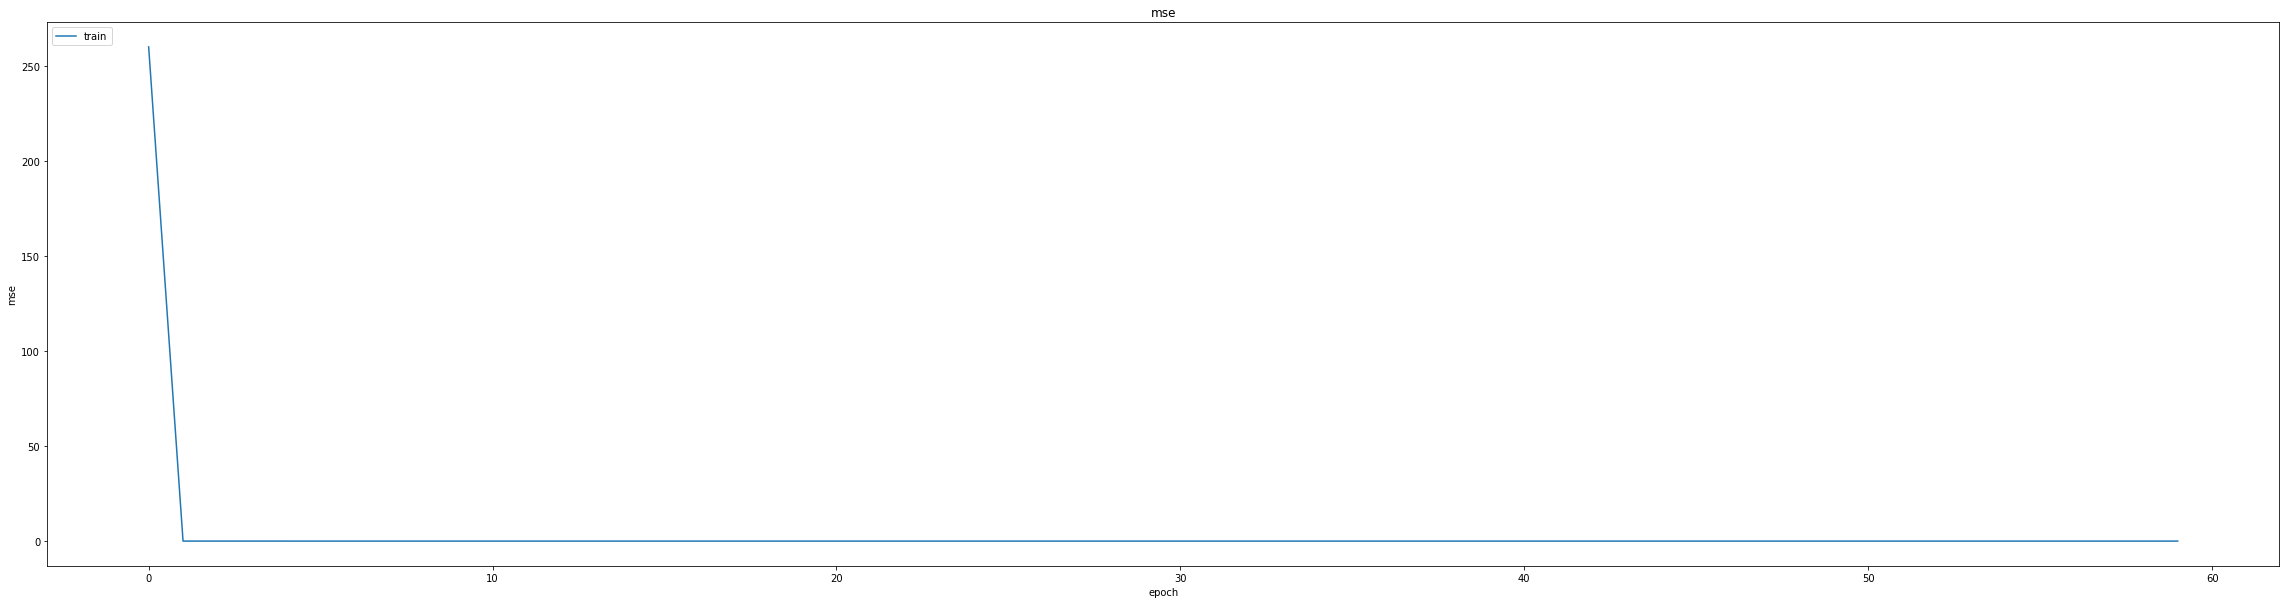

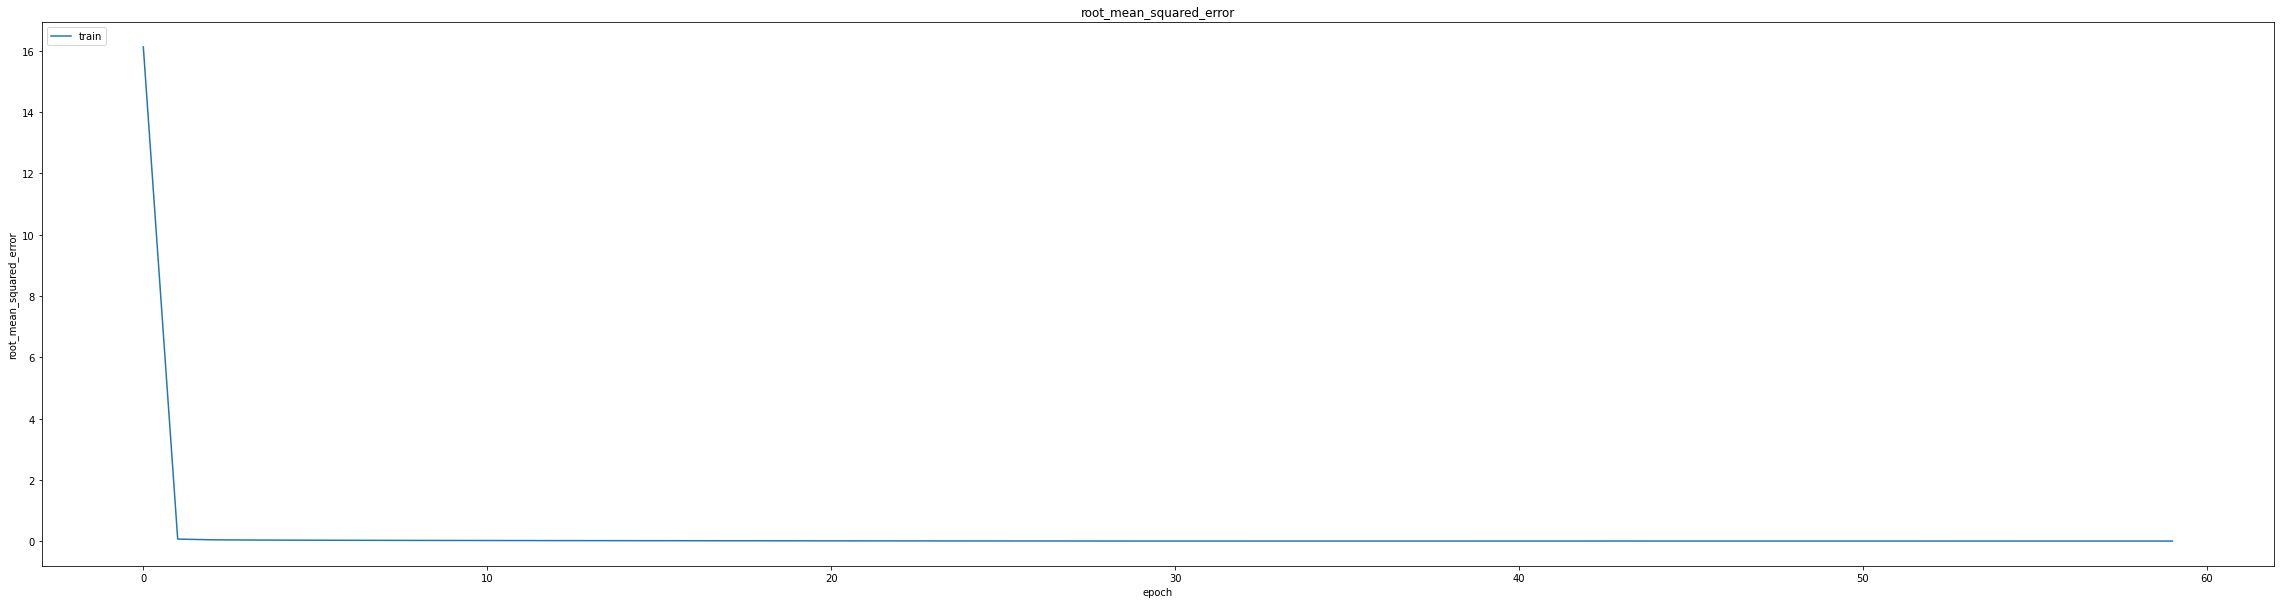

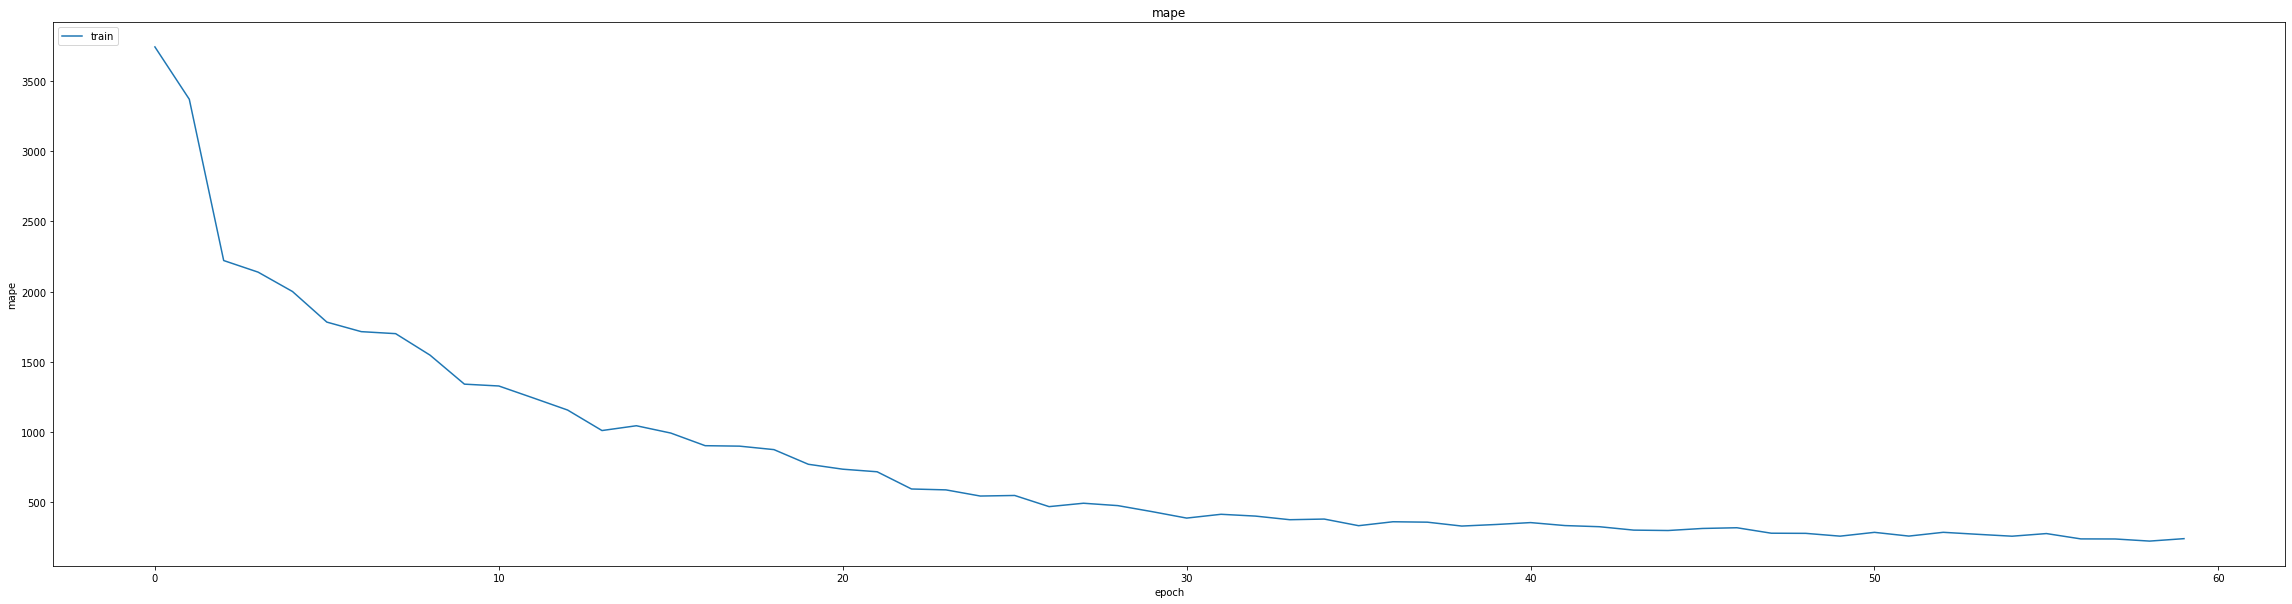

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP15min_CNN_BiLSTM.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 5.7643e-04 - mae: 0.0085 - mse: 5.7643e-04 - root_mean_squared_error: 0.0240 - mape: 223.0815
Epoch 1: val_mse did not improve from 0.00262
463/463 [==============================] - 344s 728ms/step - loss: 5.7643e-04 - mae: 0.0085 - mse: 5.7643e-04 - root_mean_squared_error: 0.0240 - mape: 223.0815 - val_loss: 0.0038 - val_mae: 0.0586 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0617 - val_mape: 1393.0085 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 1.7645e-05 - mae: 0.0032 - mse: 1.7645e-05 - root_mean_squared_error: 0.0042 - mape: 165.9109
Epoch 2: val_mse did not improve from 0.00262
463/463 [==============================] - 333s 719ms/step - loss: 1.7645e-05 - mae: 0.0032 - mse: 1.7645e-05 - root_mean_squared_error: 0.0042 - mape: 165.9109 - val_loss: 0.0034 - val_mae: 0.0558 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0586 - val_mape: 1194.6108 - lr: 0.0010
lr

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.04934510961174965
0.05192122980952263
687/687 [==============================] - 29s 39ms/step
0.9346584483083031


687/687 [==============================] - 28s 38ms/step


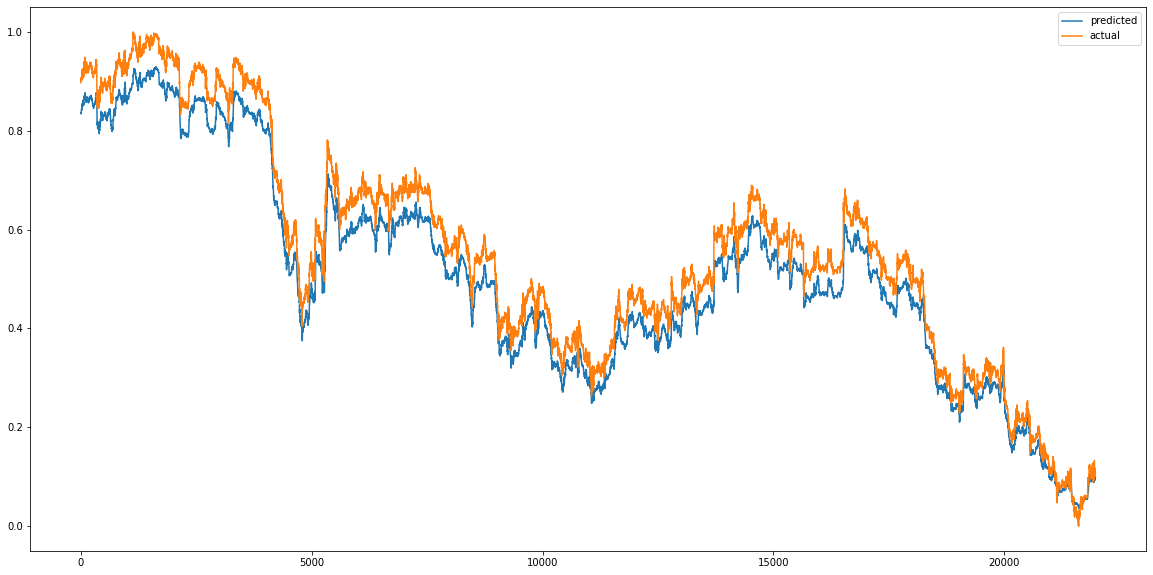

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP15min_CNN_BiLSTM.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


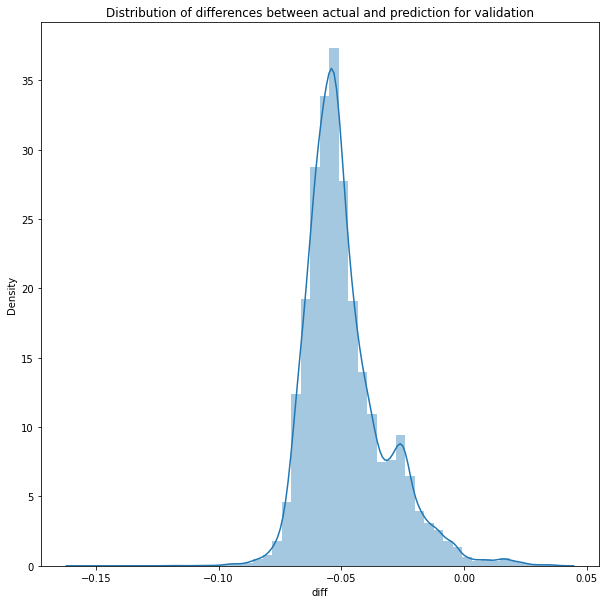

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 29s 42ms/step


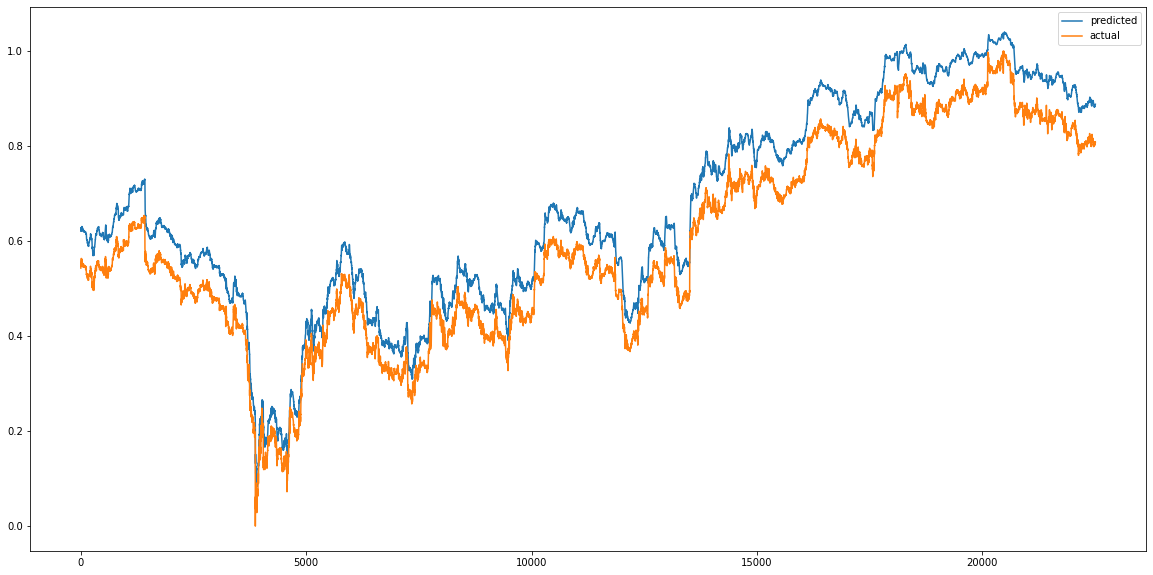

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


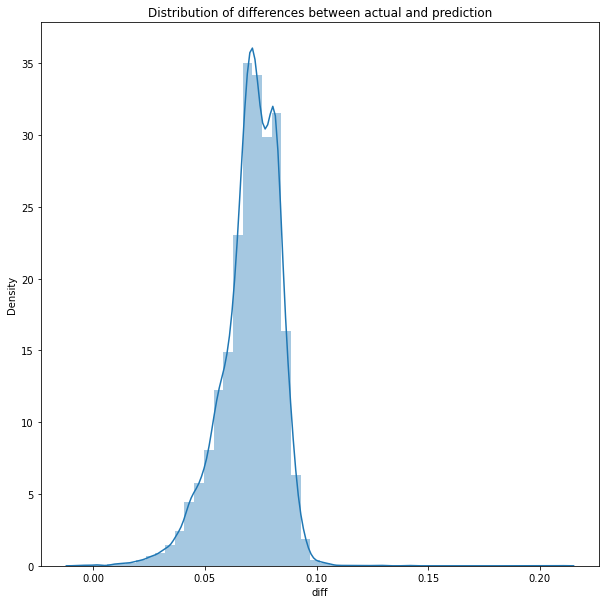

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.005115337567842694
MAE :  0.07032744037935794
RMSE  : 0.07152158812444459
704/704 [==============================] - 27s 38ms/step
R2_Score  : 0.8851508830011022


count    22508.000000
mean         0.070325
std          0.013026
min         -0.006805
25%          0.063814
50%          0.071811
75%          0.079726
max          0.209804
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 gru (GRU)                   (None, 24, 256)           247296    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                61824     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]


Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 153.8149 - mae: 1.6444 - mse: 153.8149 - root_mean_squared_error: 12.4022 - mape: 741.6487
Epoch 1: val_mse improved from inf to 0.00150, saving model to weights.best.hdf5
463/463 [==============================] - 271s 574ms/step - loss: 153.8149 - mae: 1.6444 - mse: 153.8149 - root_mean_squared_error: 12.4022 - mape: 741.6487 - val_loss: 0.0015 - val_mae: 0.0240 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0388 - val_mape: 7242.0698
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0298 - mse: 0.0015 - root_mean_squared_error: 0.0394 - mape: 591.4519
Epoch 2: val_mse improved from 0.00150 to 0.00049, saving model to weights.best.hdf5
463/463 [==============================] - 268s 580ms/step - loss: 0.0015 - mae: 0.0298 - mse: 0.0015 - root_mean_squared_error: 0.0394 - mape: 591.4519 - val_loss: 4.9163e-04 - val_mae: 0.0151 - val_mse: 4.9163e-04 - val_root_mean_squared_erro

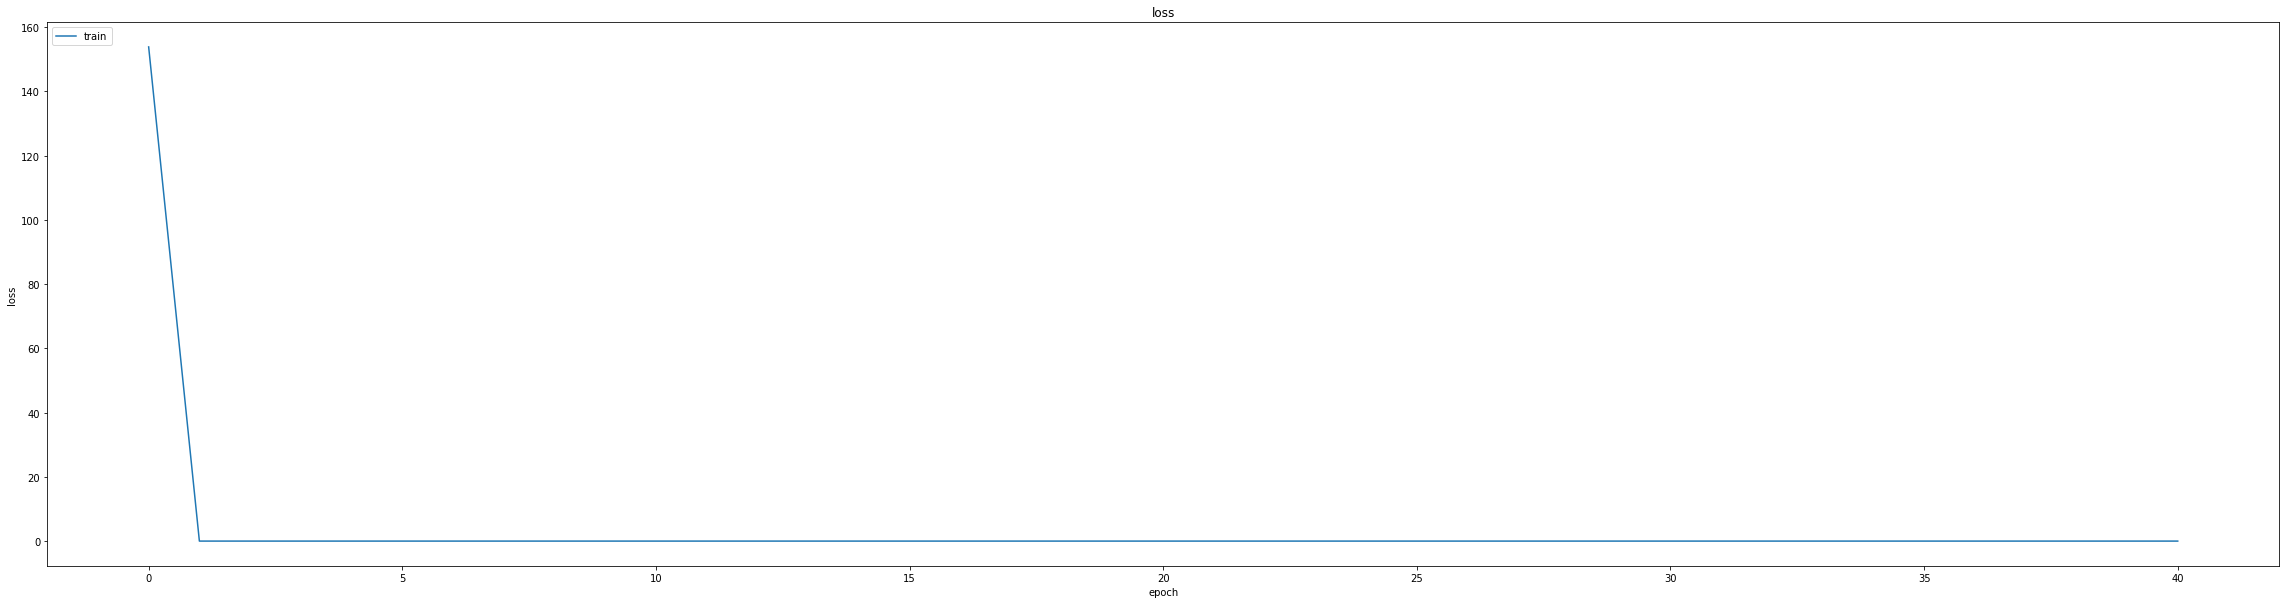

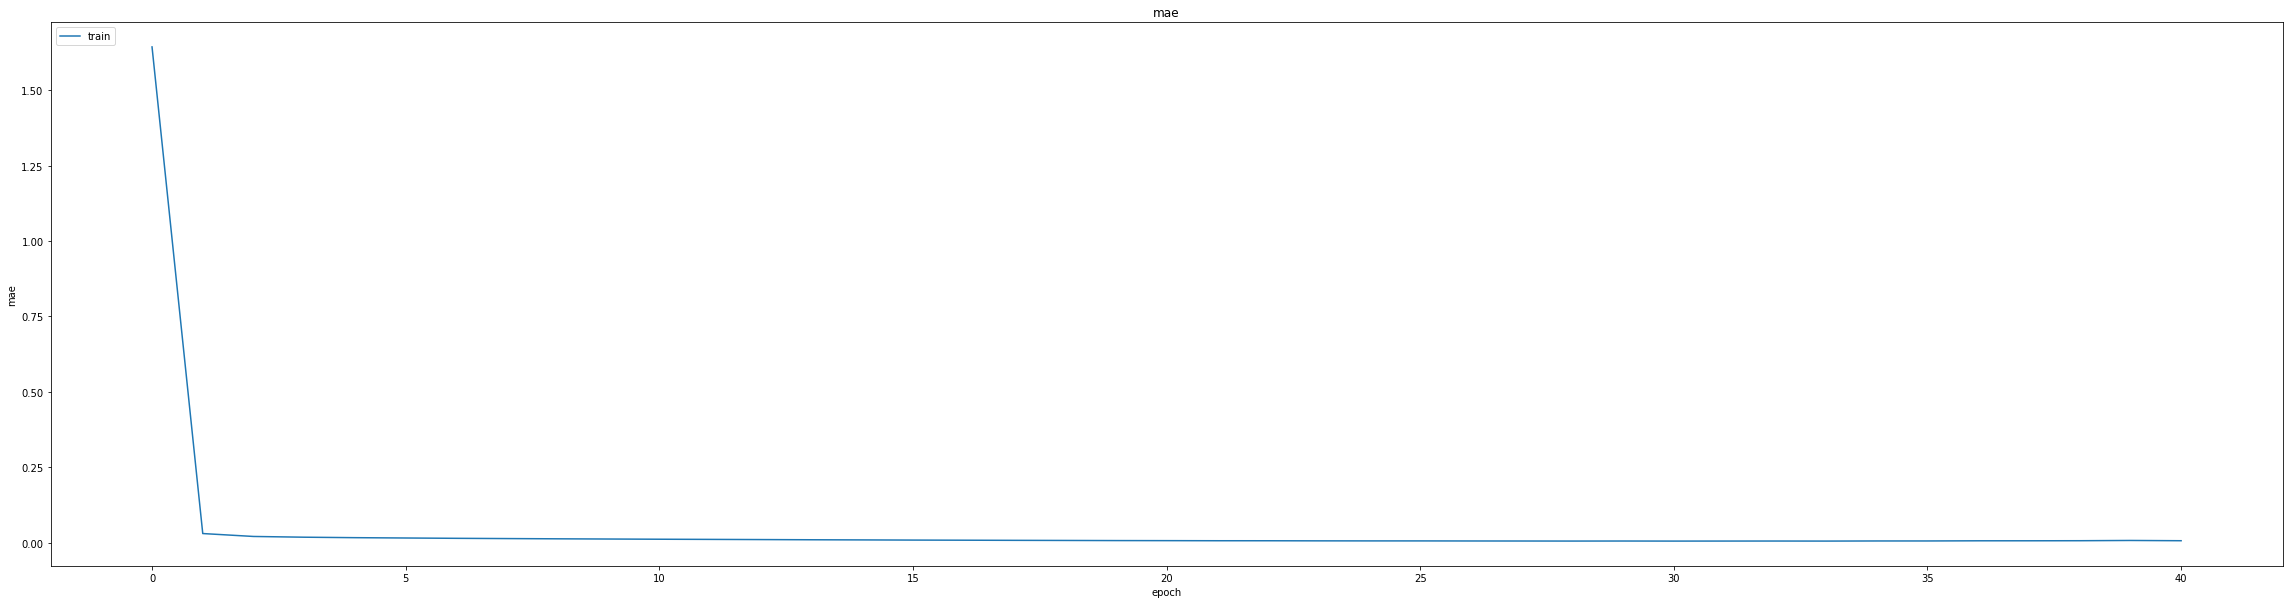

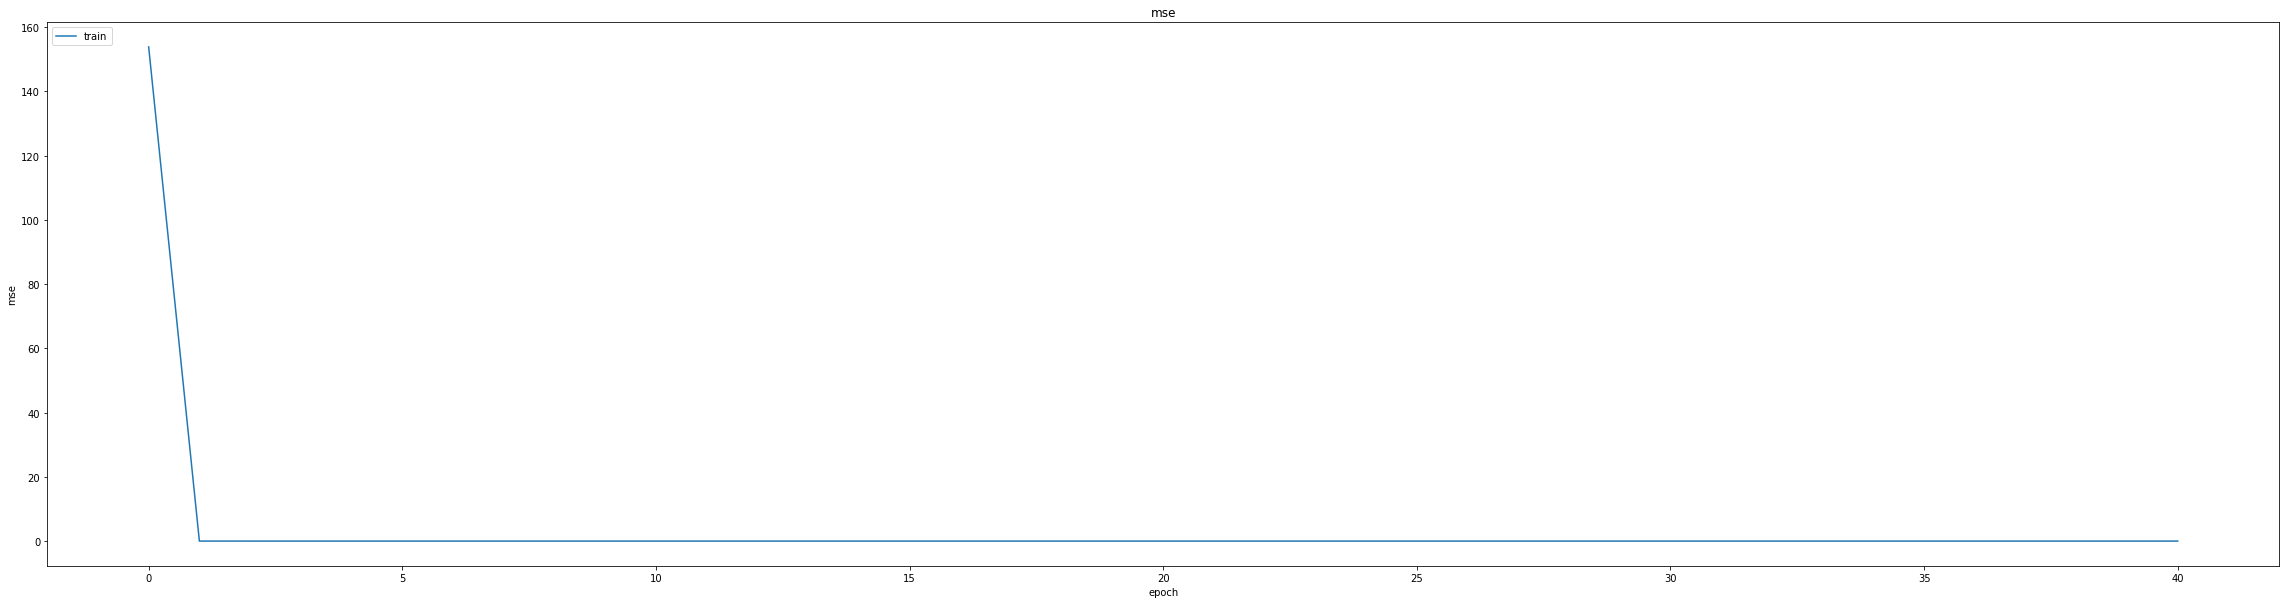

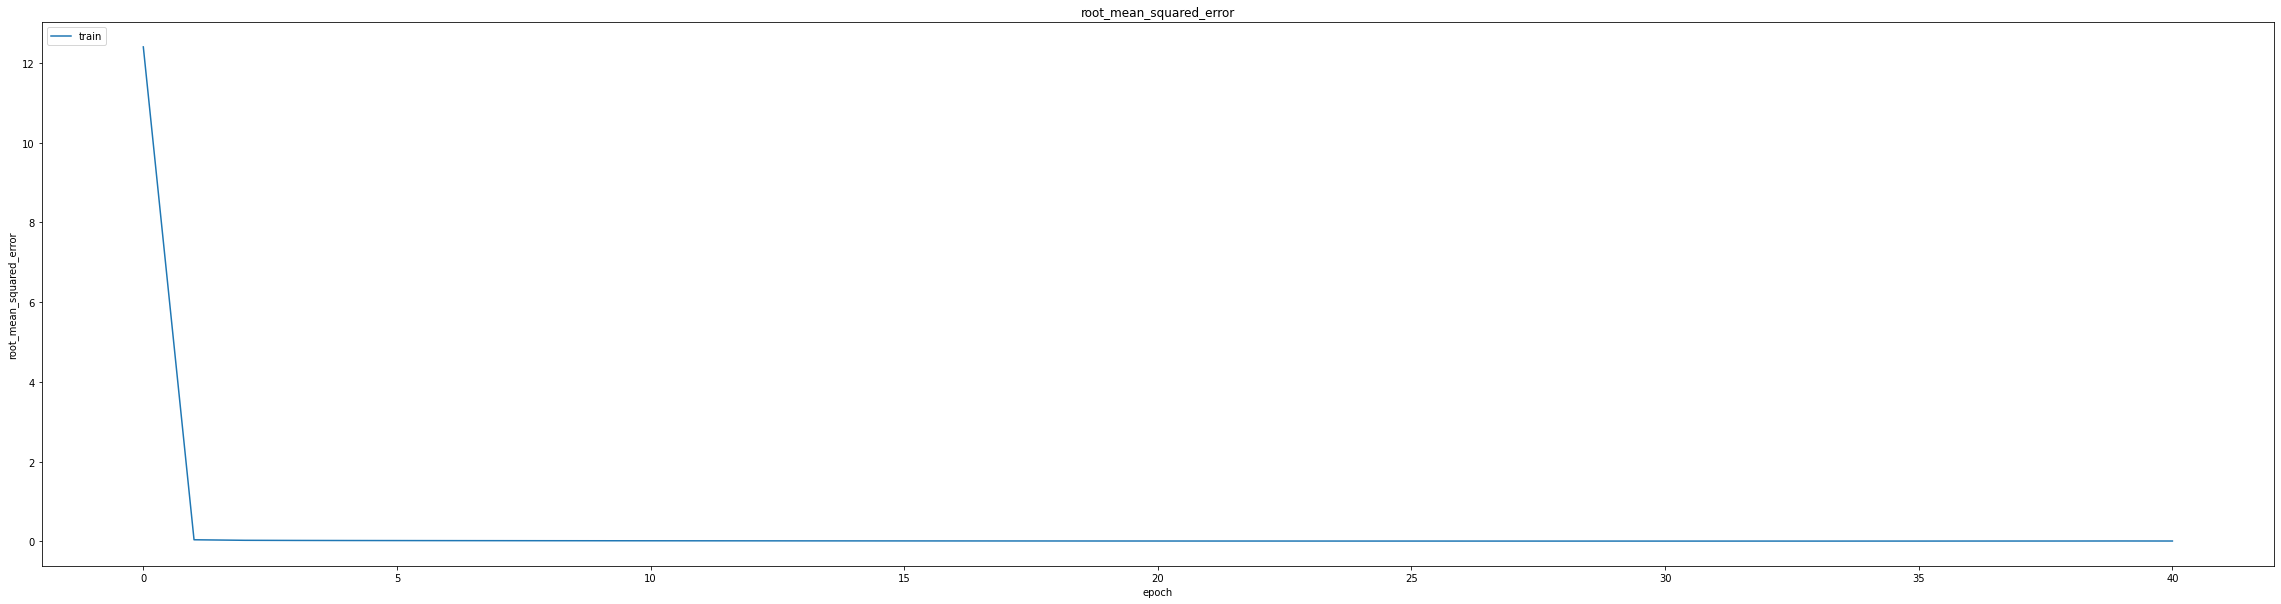

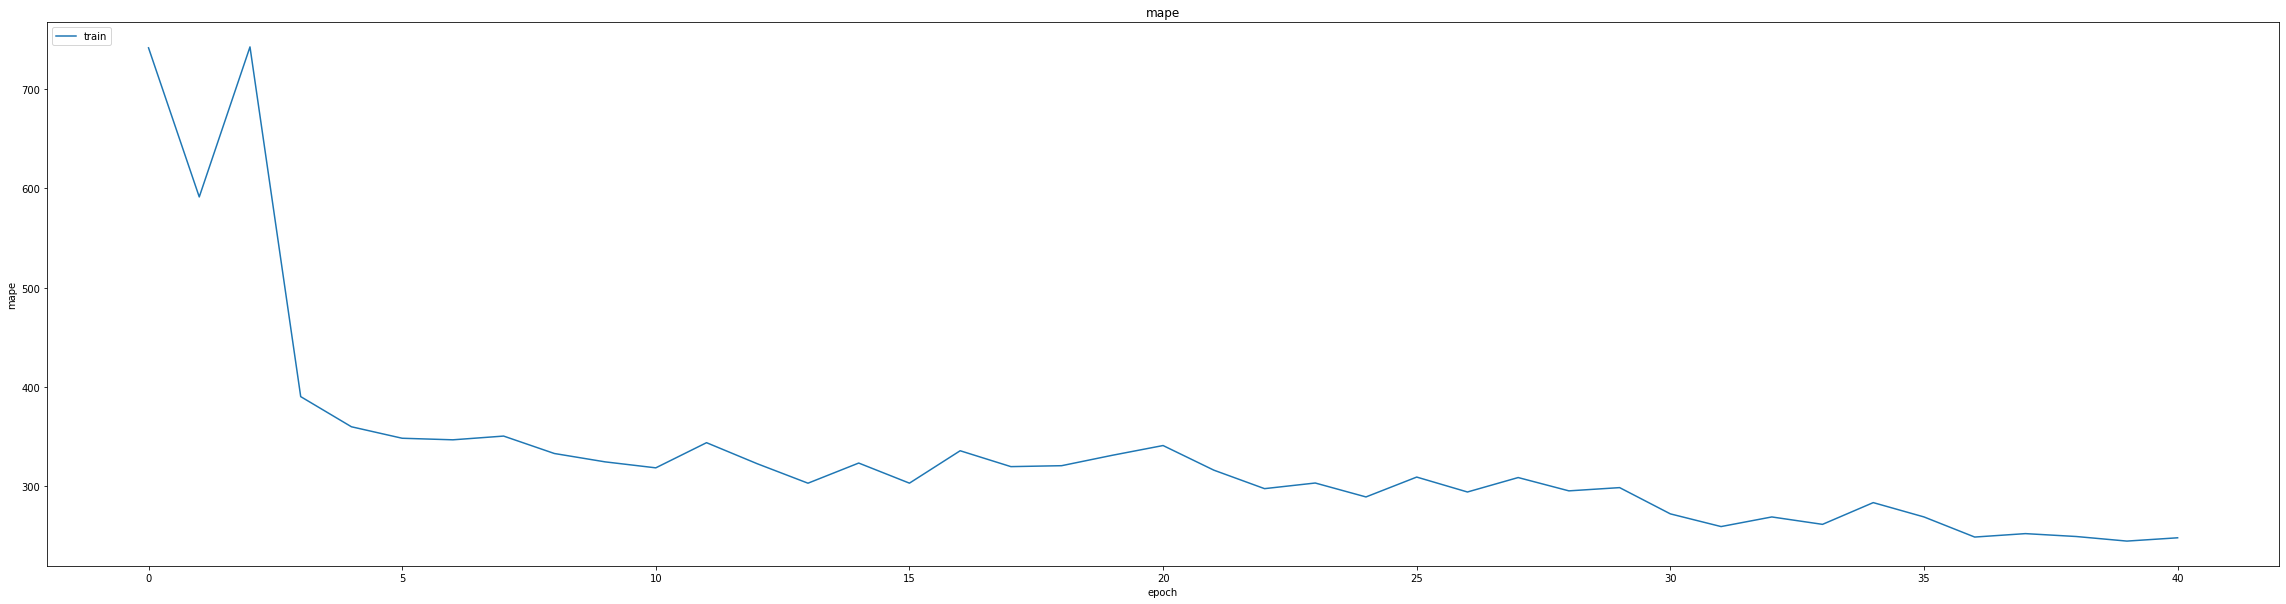

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012162926606833935
0.01616000011563301
687/687 [==============================] - 22s 30ms/step
0.9406497035257575


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=12)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 0.0053 - mae: 0.0277 - mse: 0.0053 - root_mean_squared_error: 0.0730 - mape: 306.9599
Epoch 1: val_mse did not improve from 0.00026
463/463 [==============================] - 283s 602ms/step - loss: 0.0053 - mae: 0.0277 - mse: 0.0053 - root_mean_squared_error: 0.0730 - mape: 306.9599 - val_loss: 3.1934e-04 - val_mae: 0.0133 - val_mse: 3.1934e-04 - val_root_mean_squared_error: 0.0179 - val_mape: 2185.5461 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 1.1972e-04 - mae: 0.0086 - mse: 1.1972e-04 - root_mean_squared_error: 0.0109 - mape: 315.0569
Epoch 2: val_mse did not improve from 0.00026
463/463 [==============================] - 272s 589ms/step - loss: 1.1972e-04 - mae: 0.0086 - mse: 1.1972e-04 - root_mean_squared_error: 0.0109 - mape: 315.0569 - val_loss: 3.5537e-04 - val_mae: 0.0149 - val_mse: 3.5537e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 2224.1191 - lr: 0.0010
lr

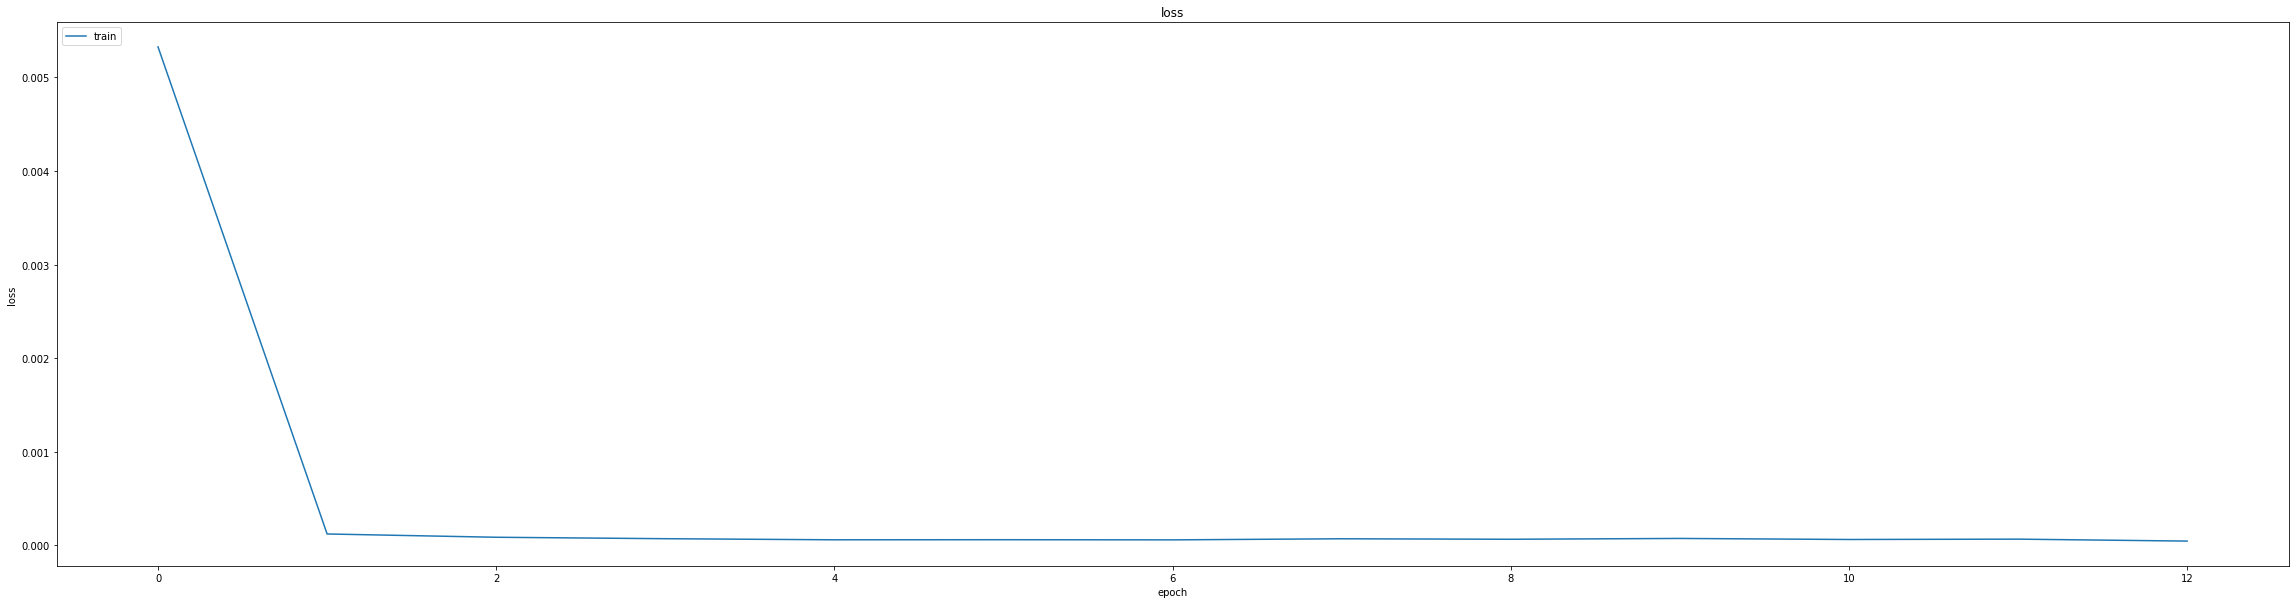

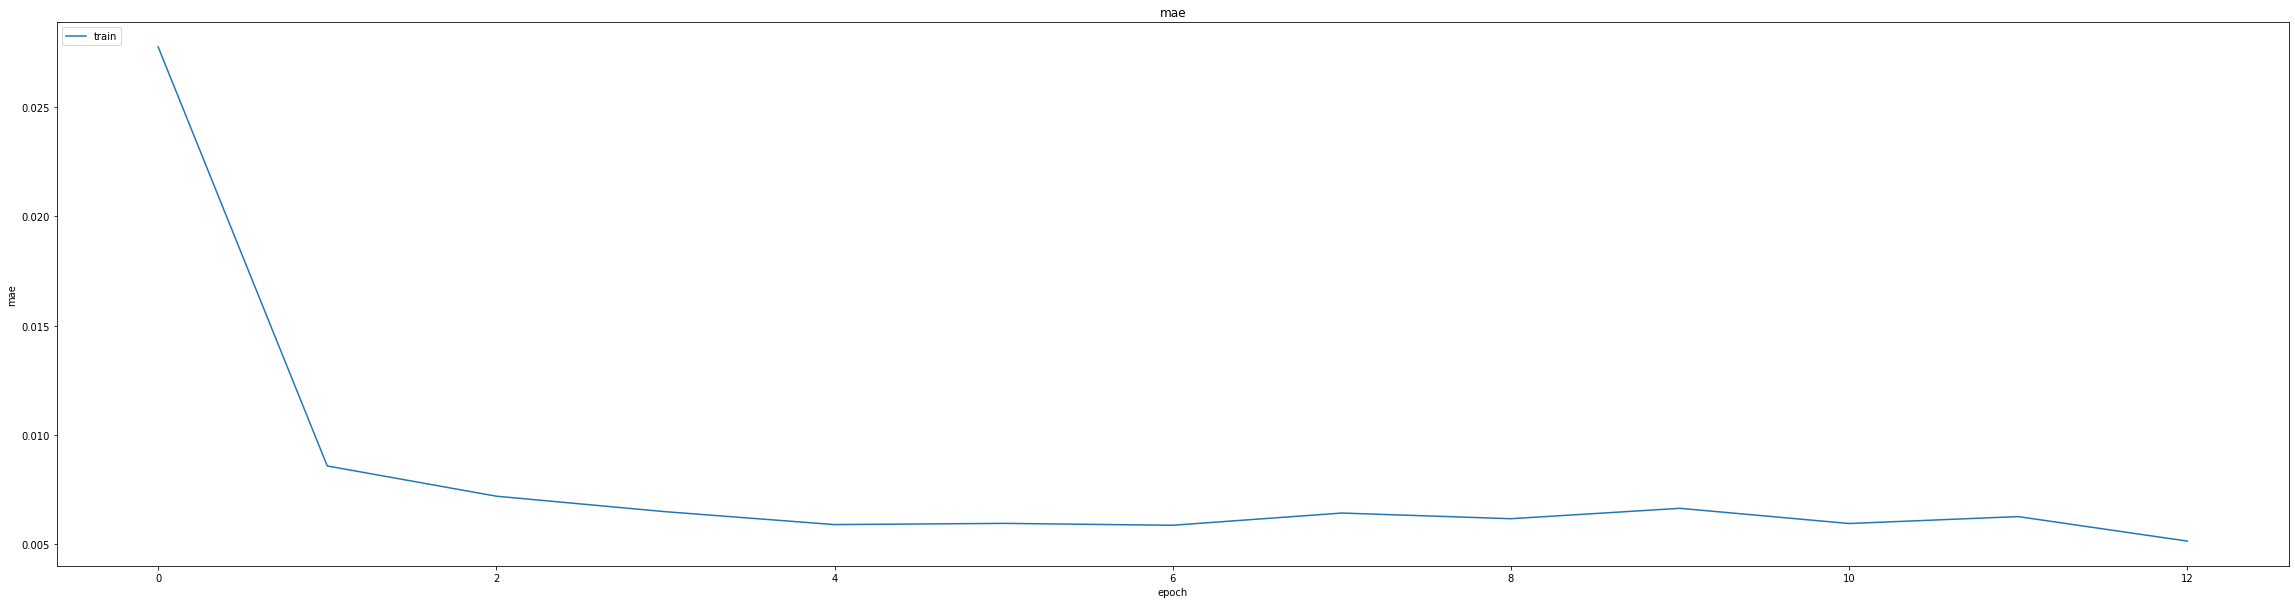

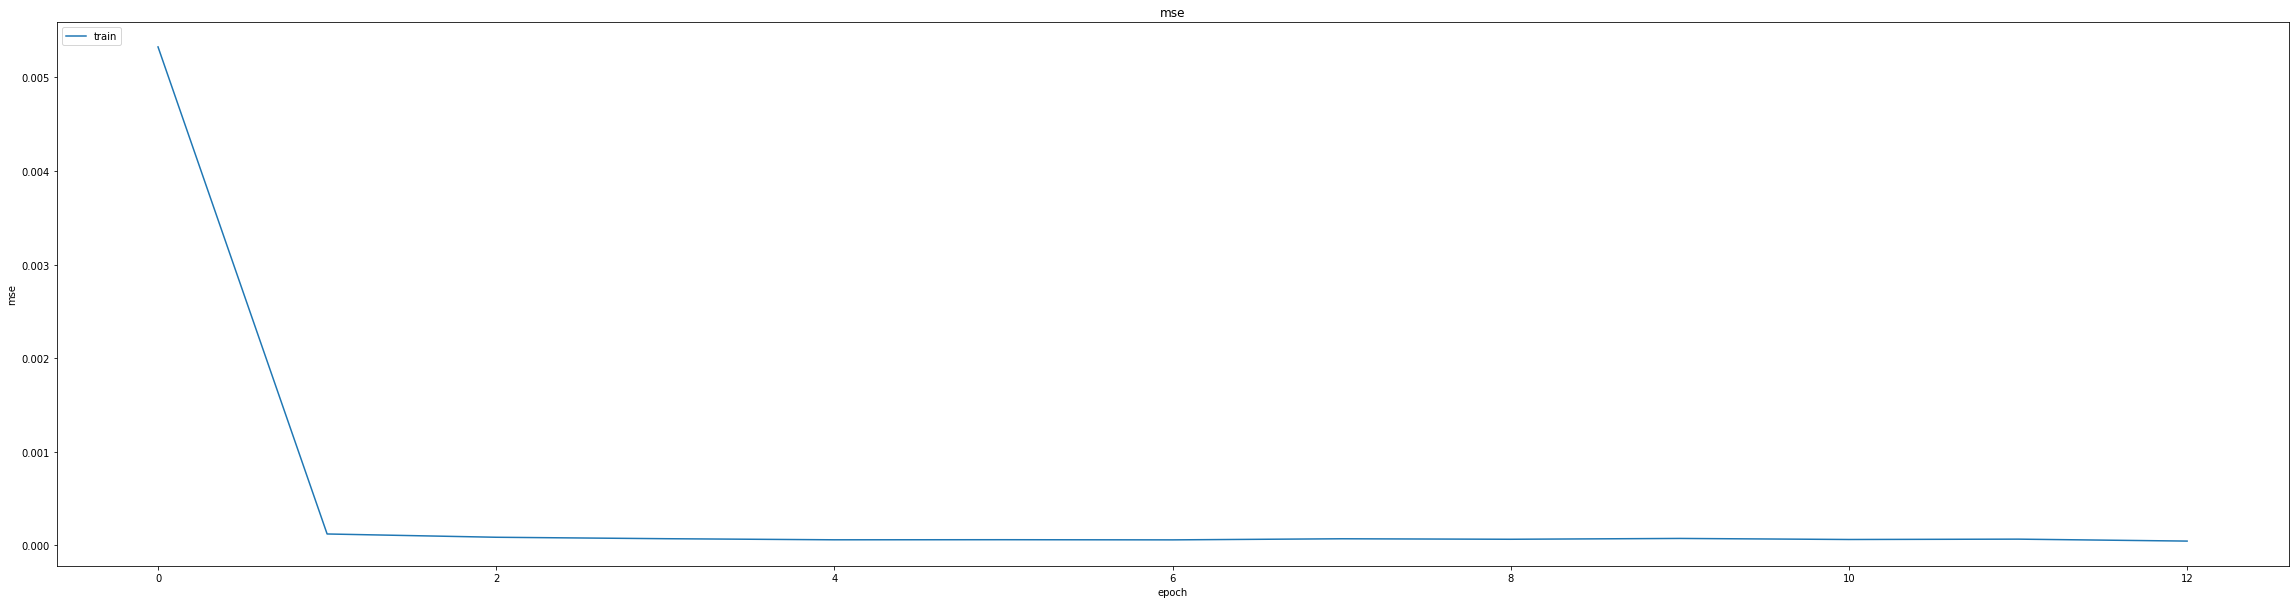

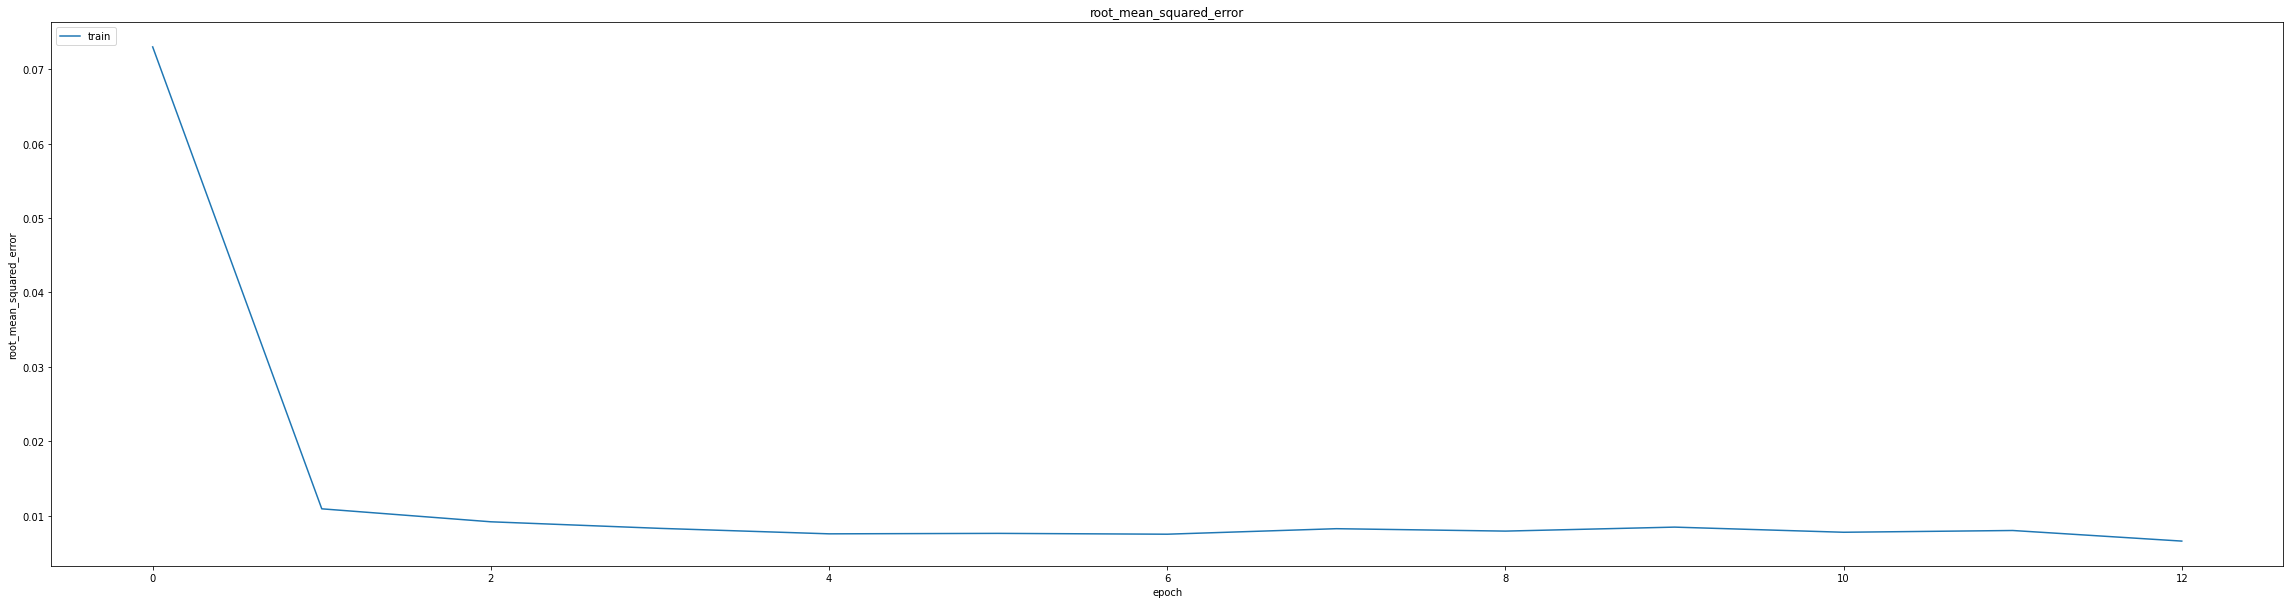

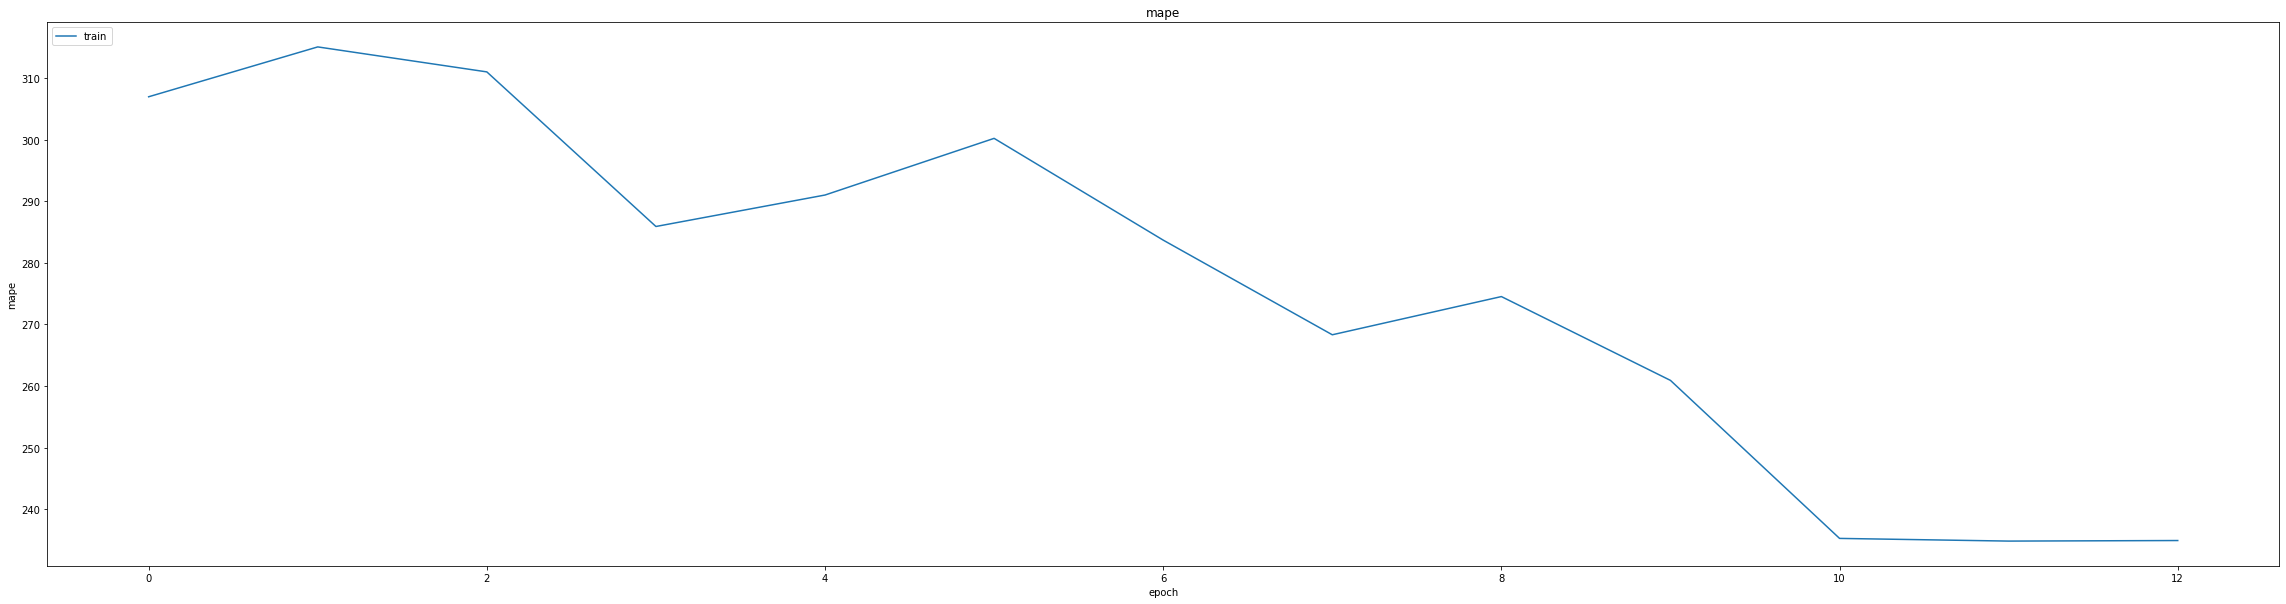

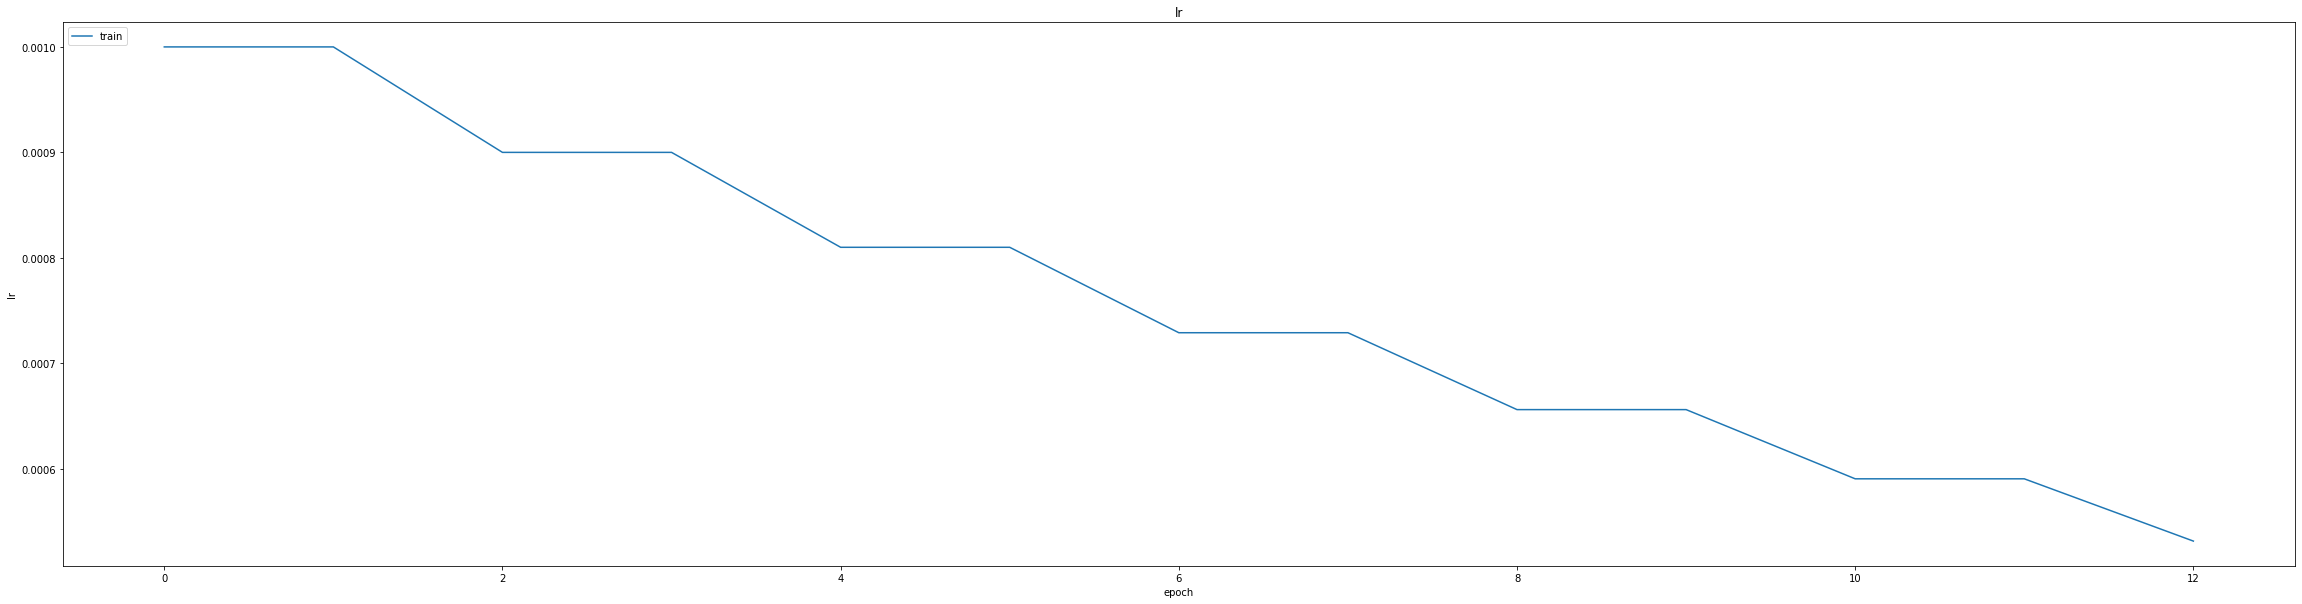

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.013289544731378555
0.017870217561721802
687/687 [==============================] - 38s 53ms/step
0.9840351035200455


687/687 [==============================] - 20s 30ms/step


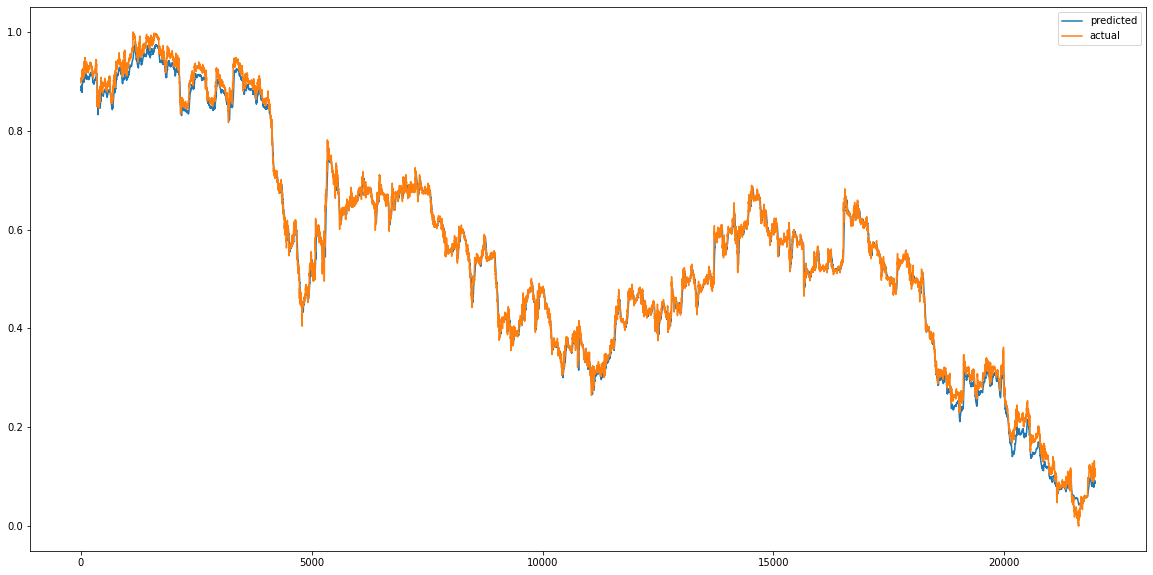

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


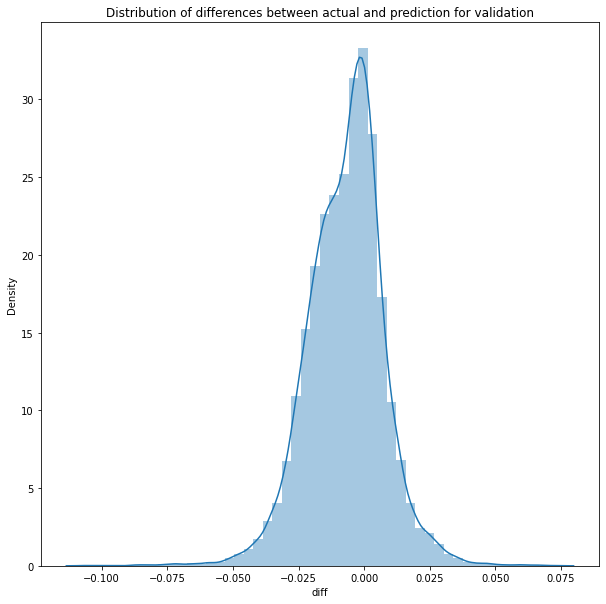

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 21s 30ms/step


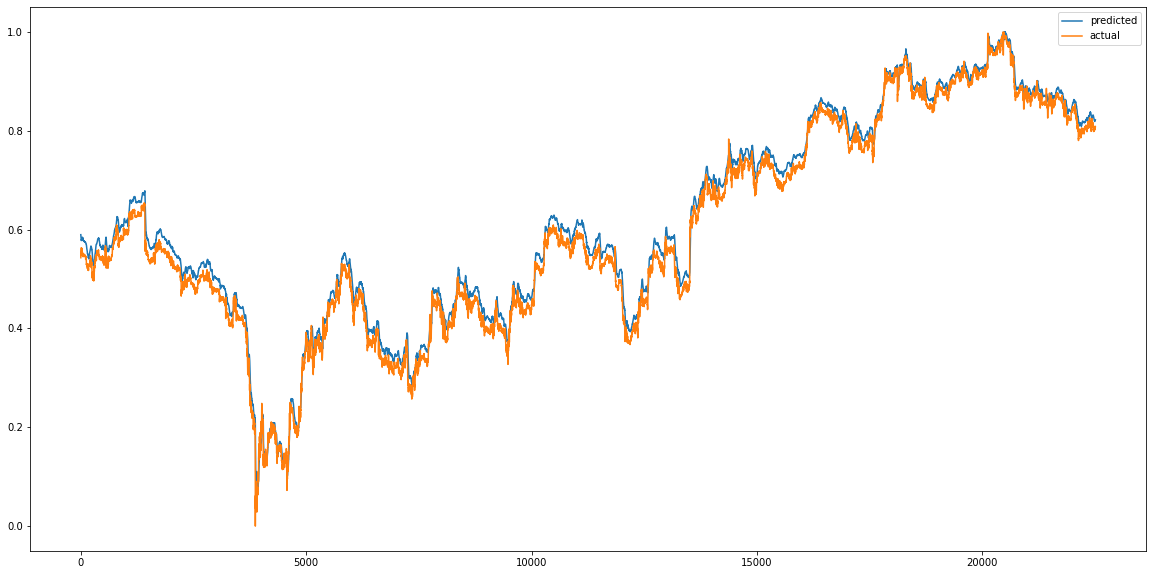

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


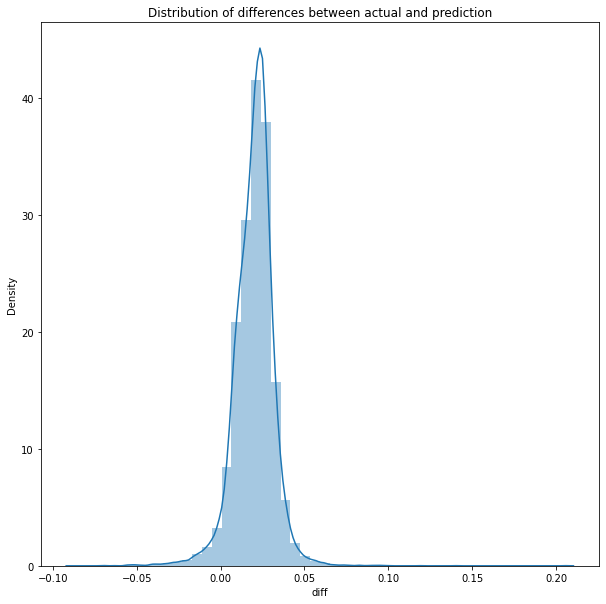

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0005372672396616234
MAE :  0.020894233108239464
RMSE  : 0.023179025856614927
704/704 [==============================] - 21s 31ms/step
R2_Score  : 0.9879373223589883


count    22508.000000
mean         0.020011
std          0.011697
min         -0.087269
25%          0.013649
50%          0.021005
75%          0.026686
max          0.205555
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           328704    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint





checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 0.0196 - mae: 0.0685 - mse: 0.0196 - root_mean_squared_error: 0.1400 - mape: 1147.3041
Epoch 1: val_mse improved from inf to 0.00111, saving model to weights.best.hdf5
463/463 [==============================] - 350s 746ms/step - loss: 0.0196 - mae: 0.0685 - mse: 0.0196 - root_mean_squared_error: 0.1400 - mape: 1147.3041 - val_loss: 0.0011 - val_mae: 0.0307 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0334 - val_mape: 6367.6118
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 2.7061e-04 - mae: 0.0125 - mse: 2.7061e-04 - root_mean_squared_error: 0.0165 - mape: 605.4554
Epoch 2: val_mse improved from 0.00111 to 0.00090, saving model to weights.best.hdf5
463/463 [==============================] - 344s 743ms/step - loss: 2.7061e-04 - mae: 0.0125 - mse: 2.7061e-04 - root_mean_squared_error: 0.0165 - mape: 605.4554 - val_loss: 9.0088e-04 - val_mae: 0.0283 - val_mse: 9.0088e-04 - val_root_mean_squa

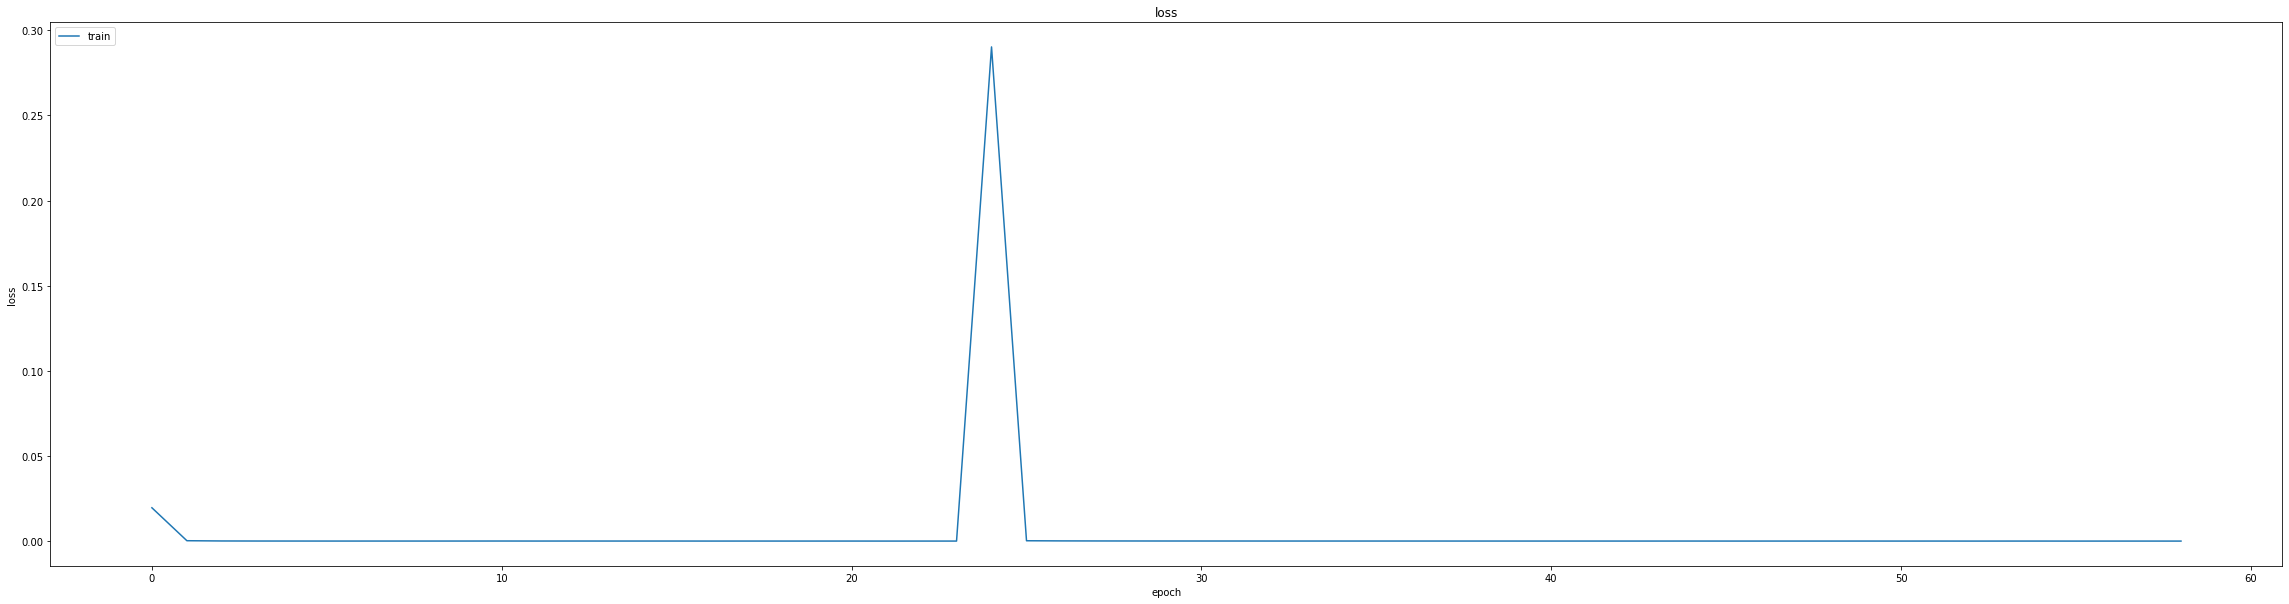

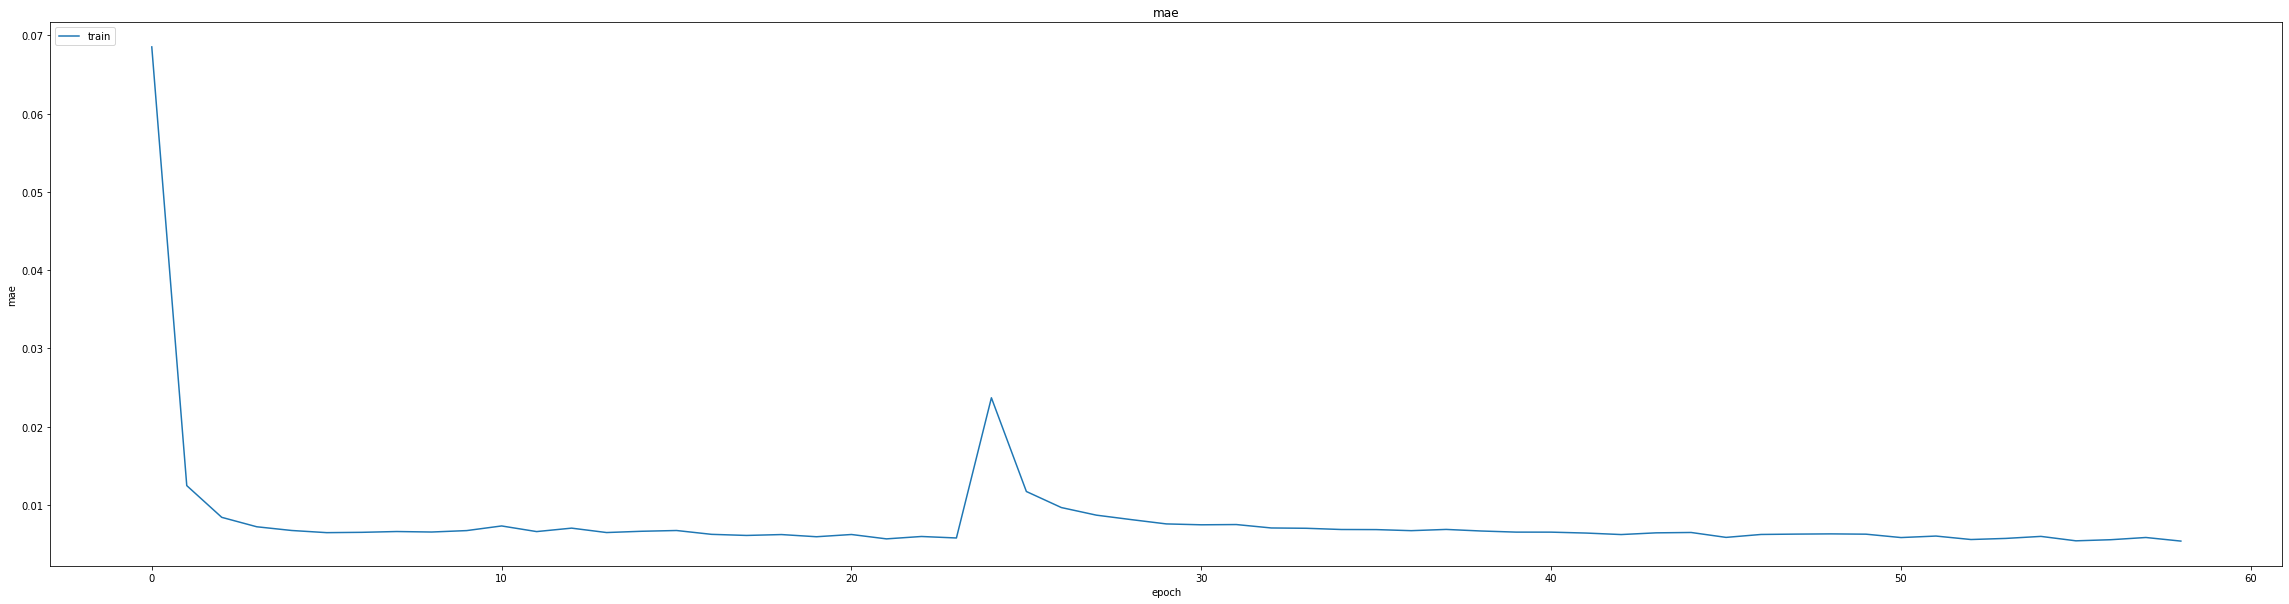

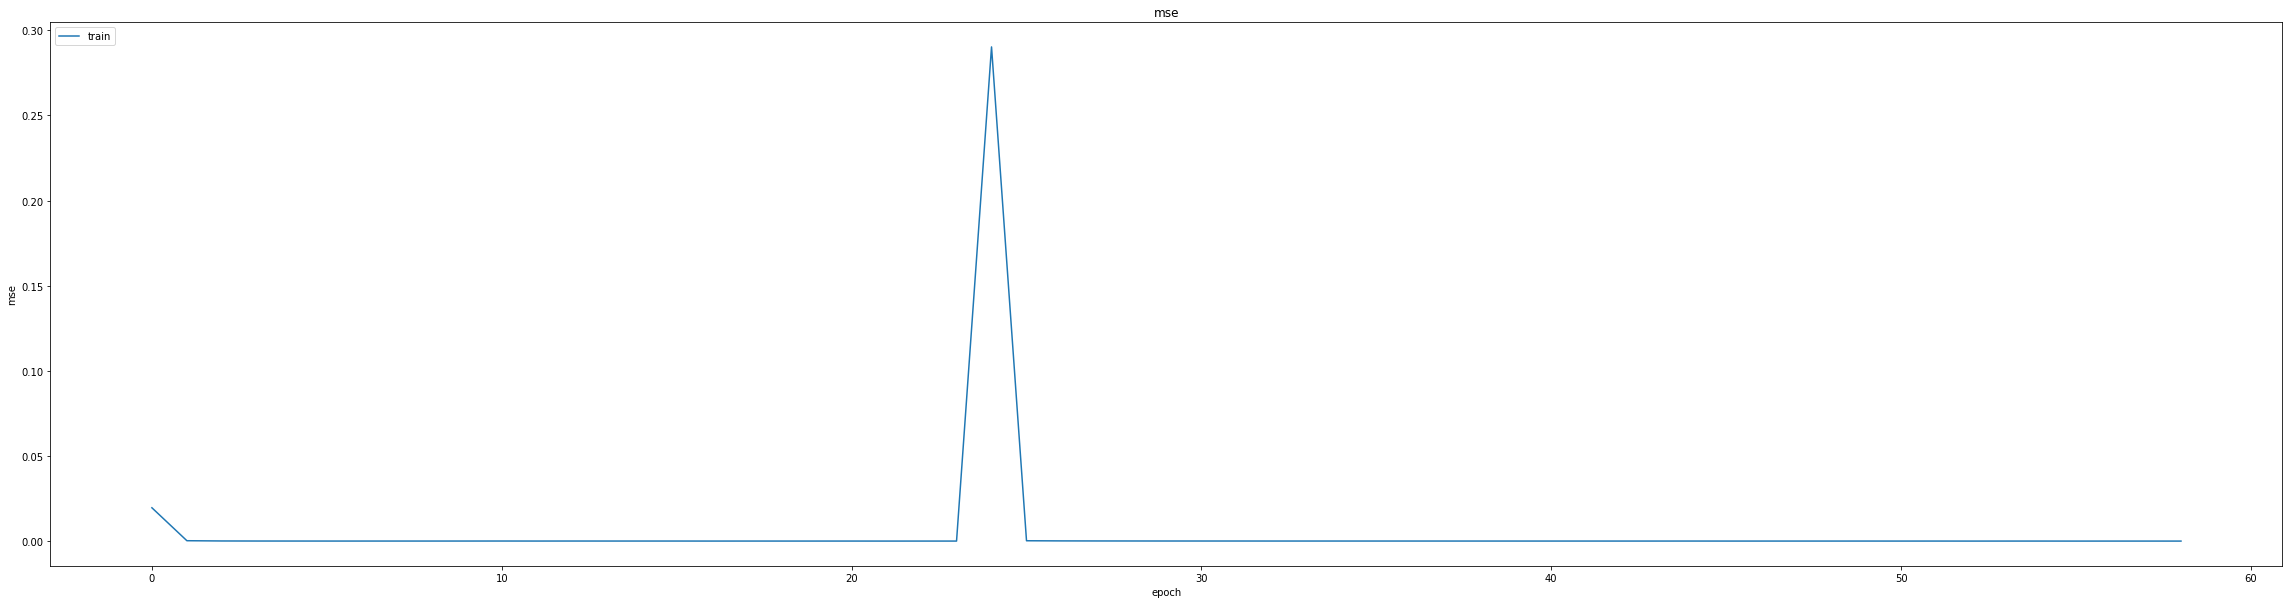

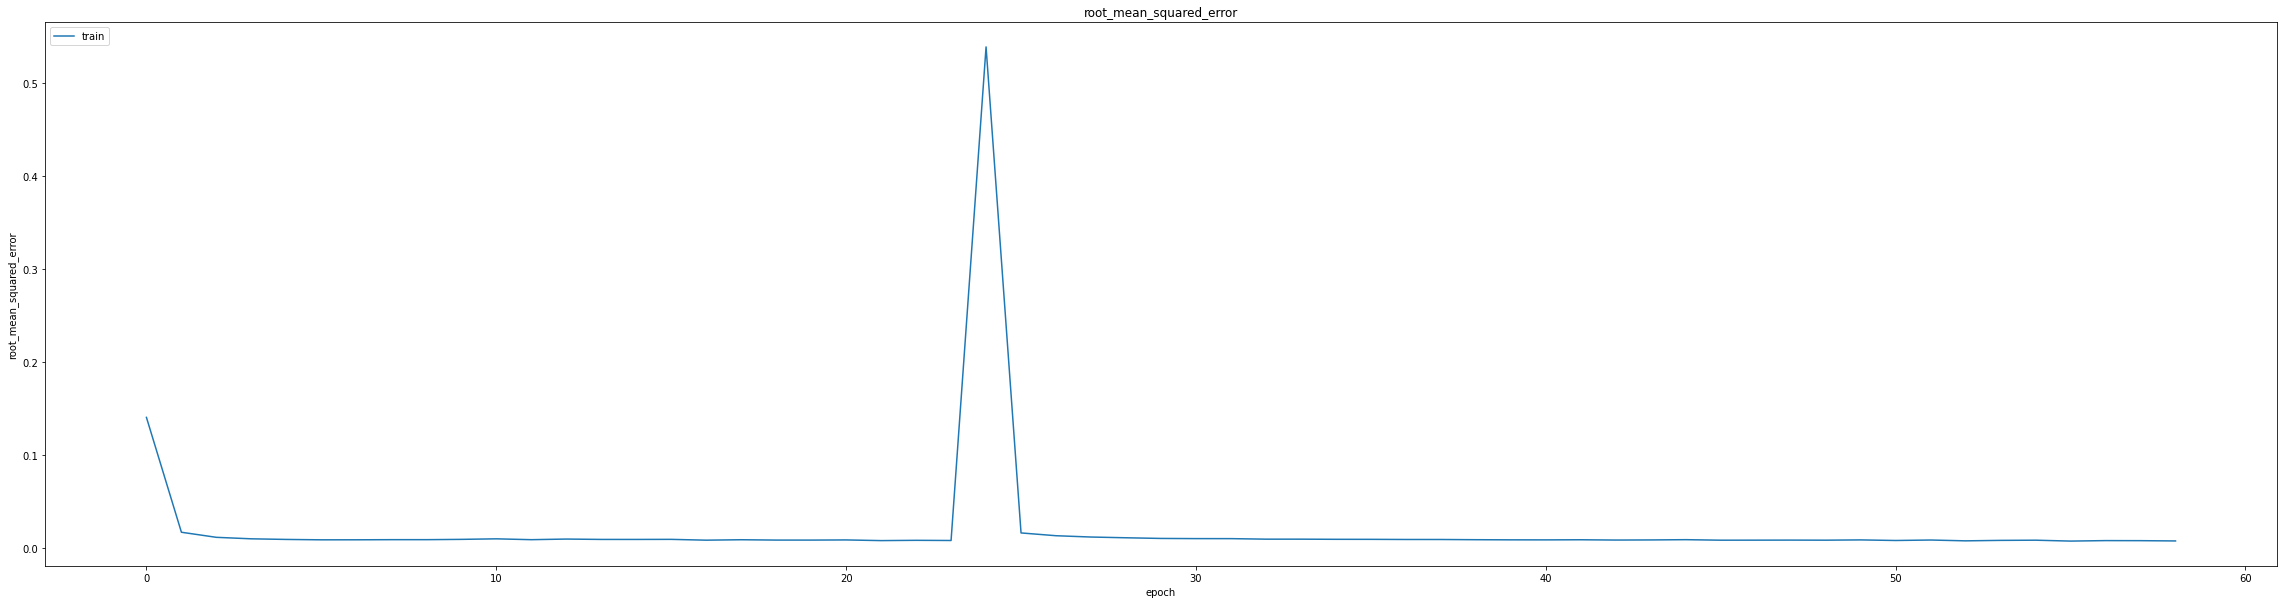

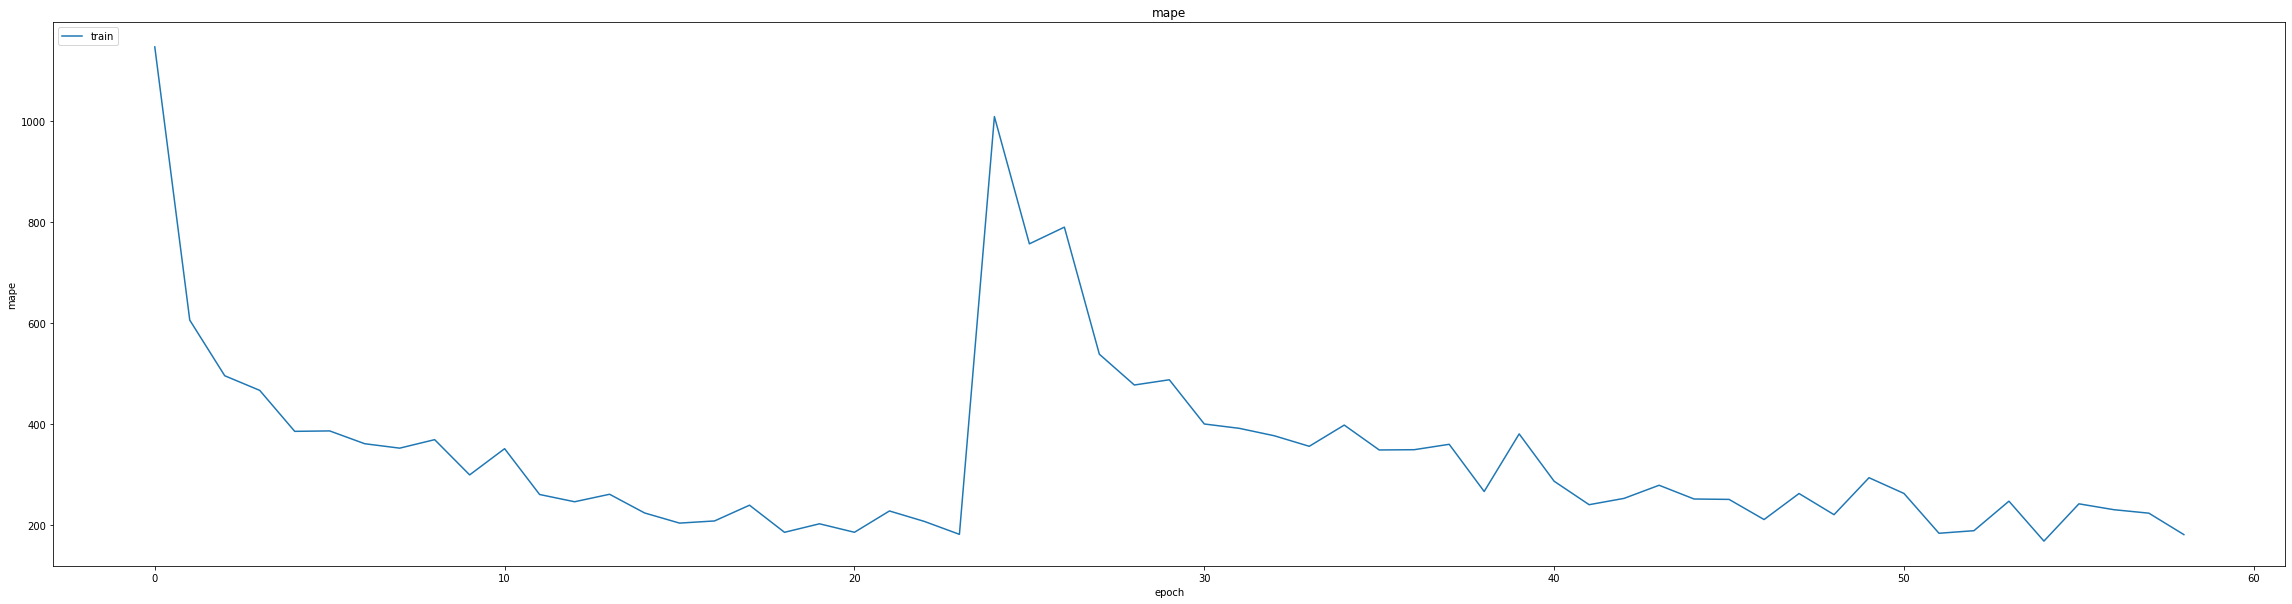

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:

print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.011696694418787956
0.014363330788910389
687/687 [==============================] - 35s 48ms/step
0.9904849420209997


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:

early_stopping = EarlyStopping(monitor='val_mse', patience=12)

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 6.7918e-04 - mae: 0.0117 - mse: 6.7918e-04 - root_mean_squared_error: 0.0261 - mape: 458.4290
Epoch 1: val_mse did not improve from 0.00021
463/463 [==============================] - 352s 748ms/step - loss: 6.7918e-04 - mae: 0.0117 - mse: 6.7918e-04 - root_mean_squared_error: 0.0261 - mape: 458.4290 - val_loss: 3.9474e-04 - val_mae: 0.0182 - val_mse: 3.9474e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 2511.1216 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 5.6368e-05 - mae: 0.0058 - mse: 5.6368e-05 - root_mean_squared_error: 0.0075 - mape: 278.2541
Epoch 2: val_mse did not improve from 0.00021
463/463 [==============================] - 344s 742ms/step - loss: 5.6368e-05 - mae: 0.0058 - mse: 5.6368e-05 - root_mean_squared_error: 0.0075 - mape: 278.2541 - val_loss: 3.4924e-04 - val_mae: 0.0168 - val_mse: 3.4924e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 2121.2495

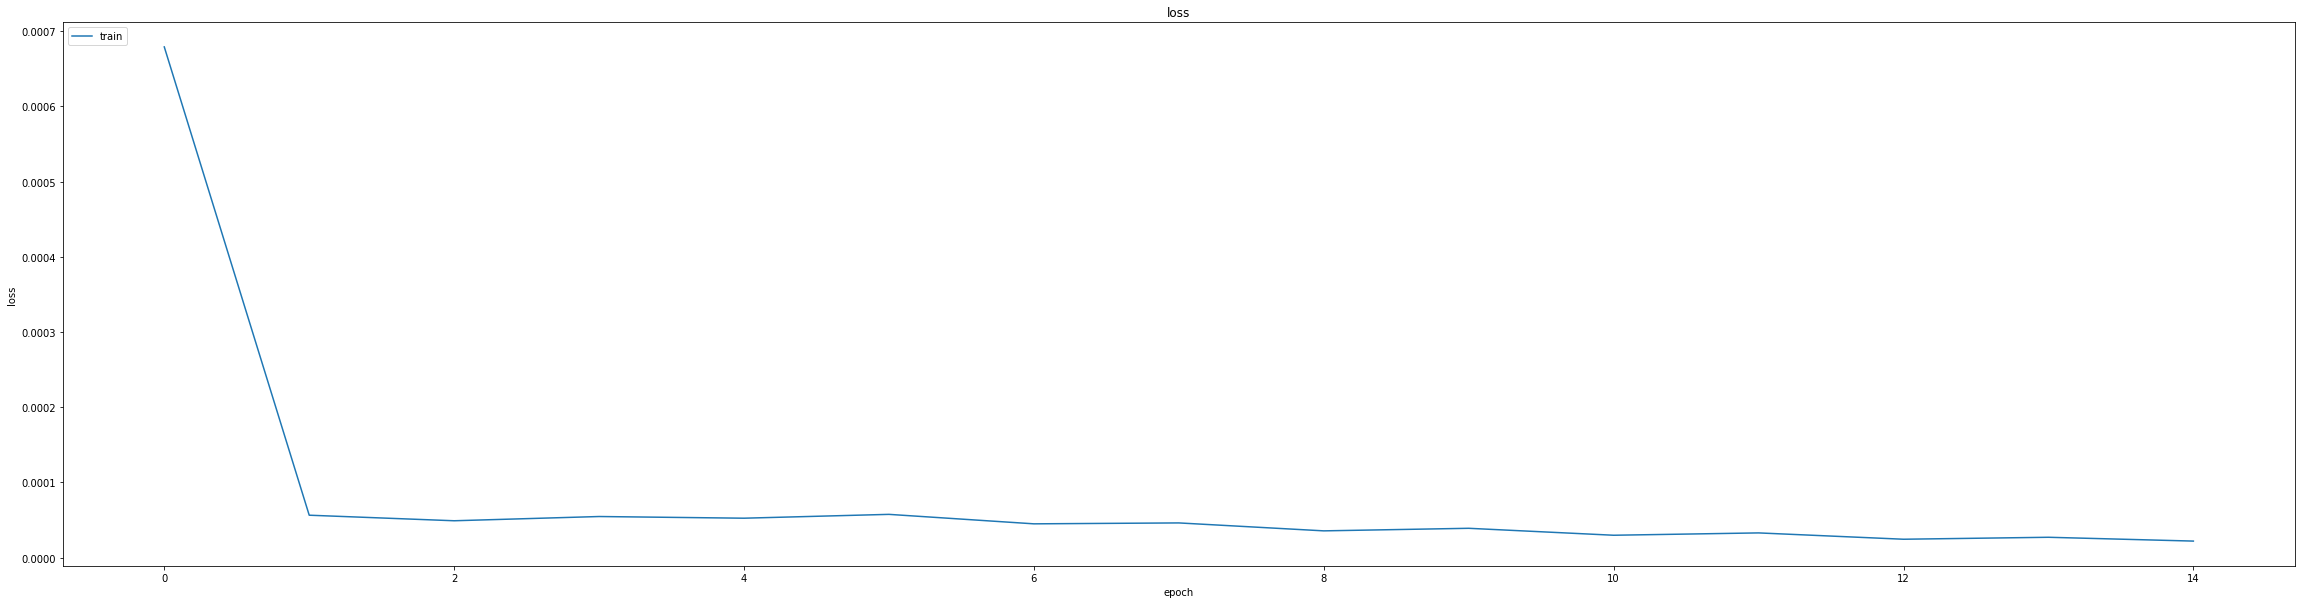

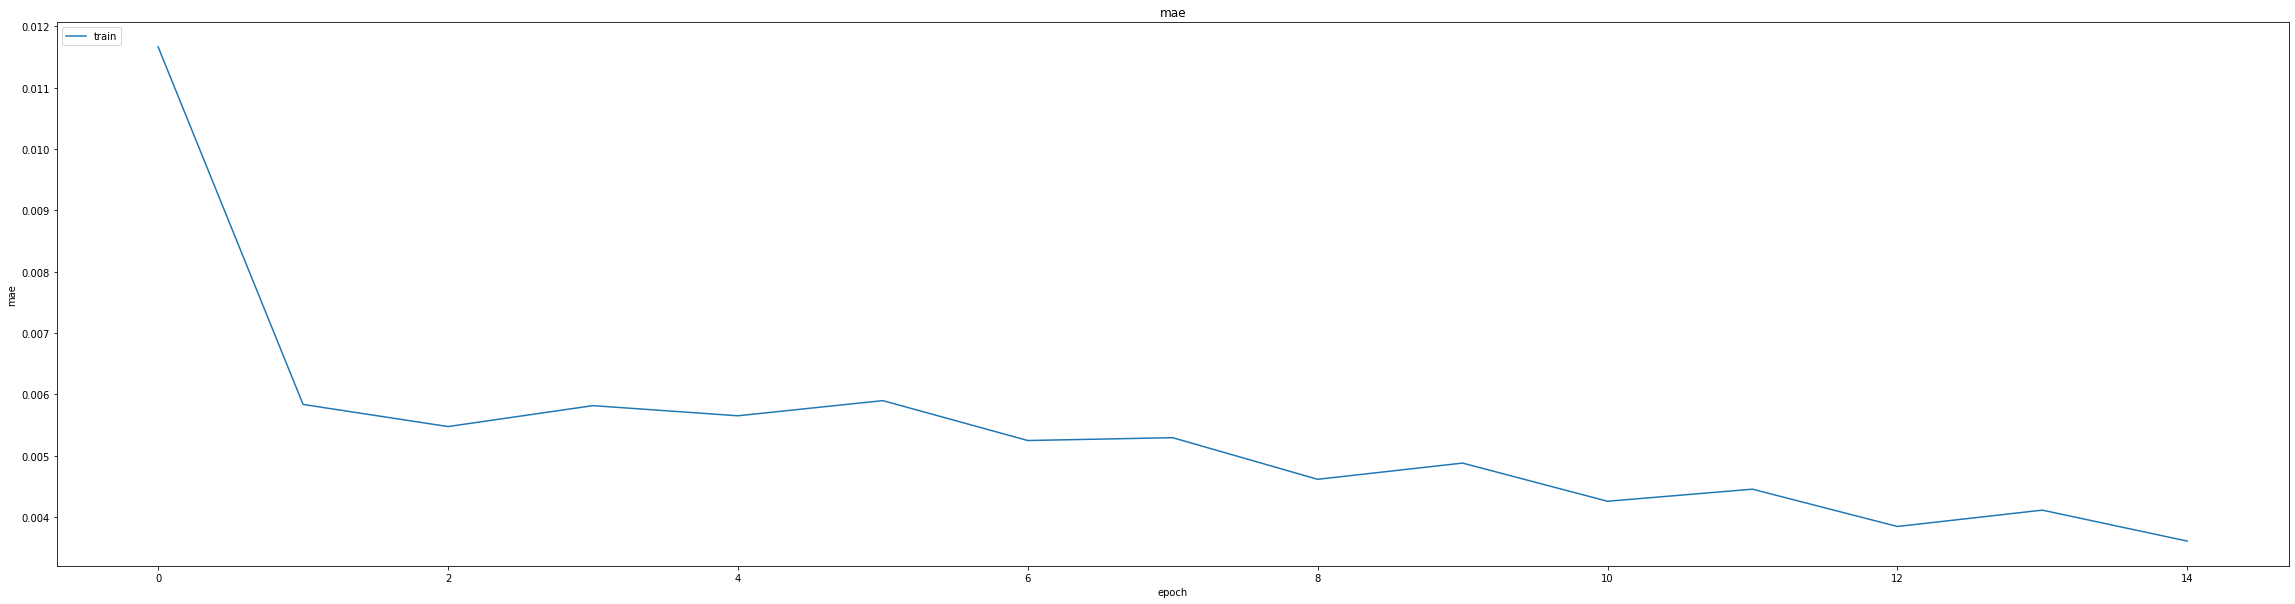

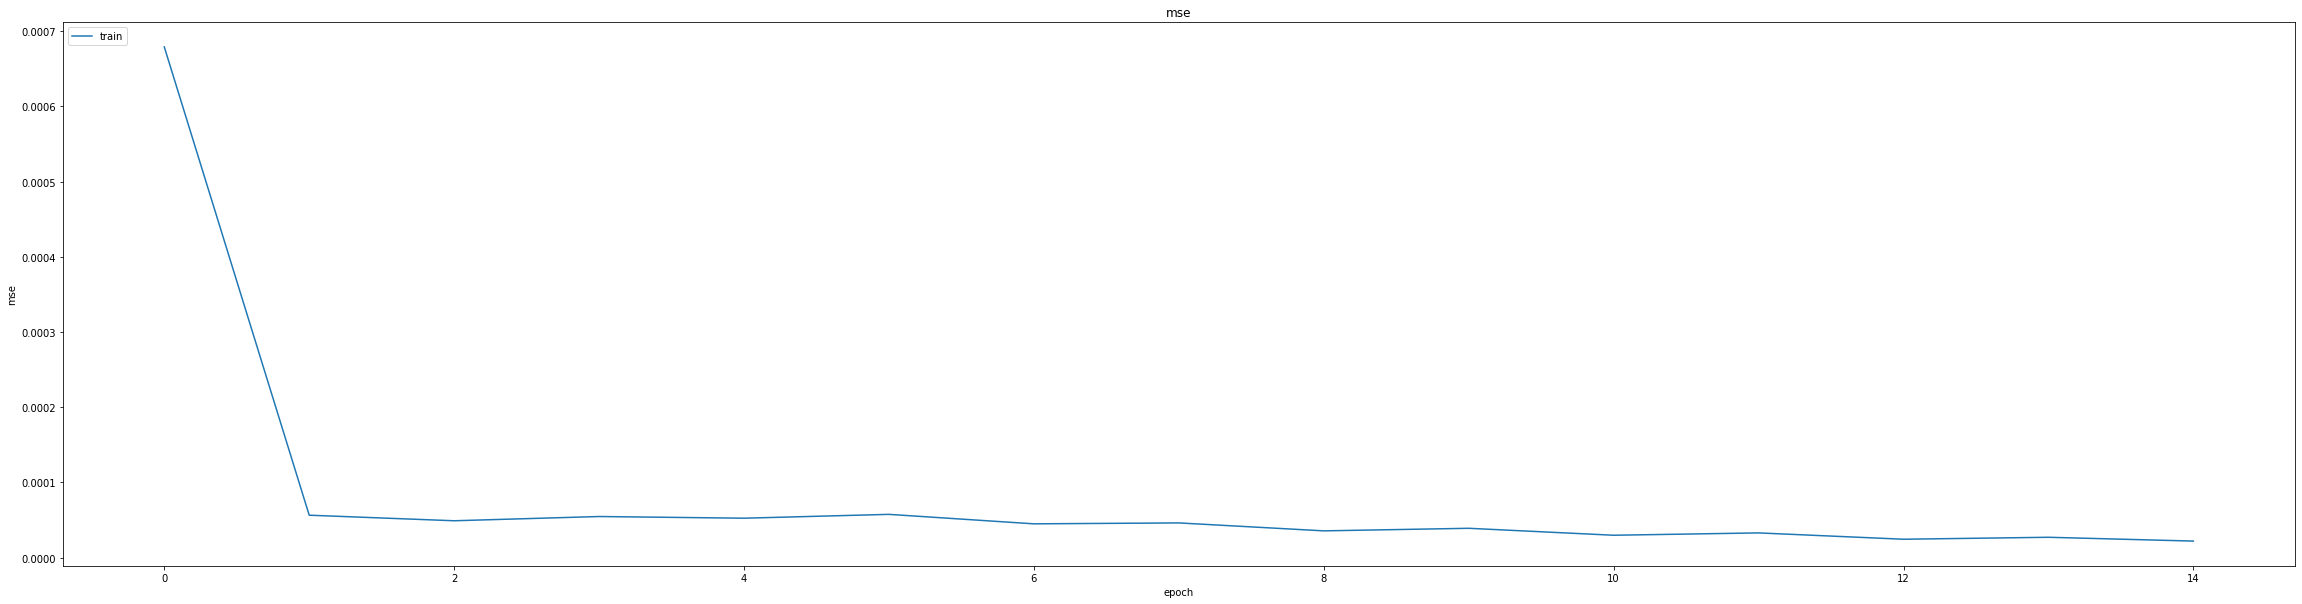

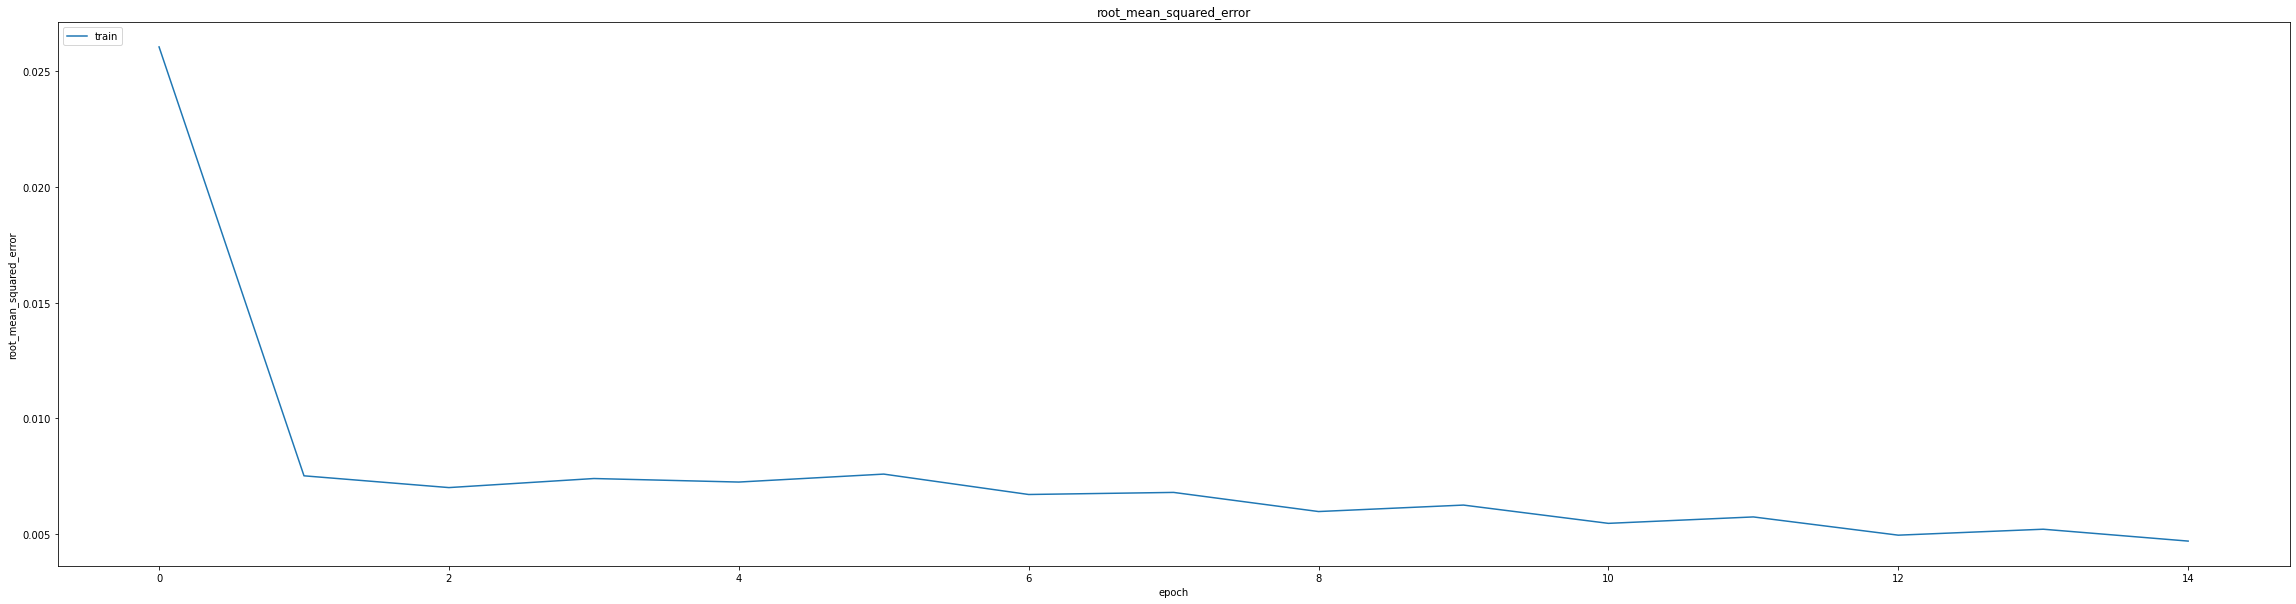

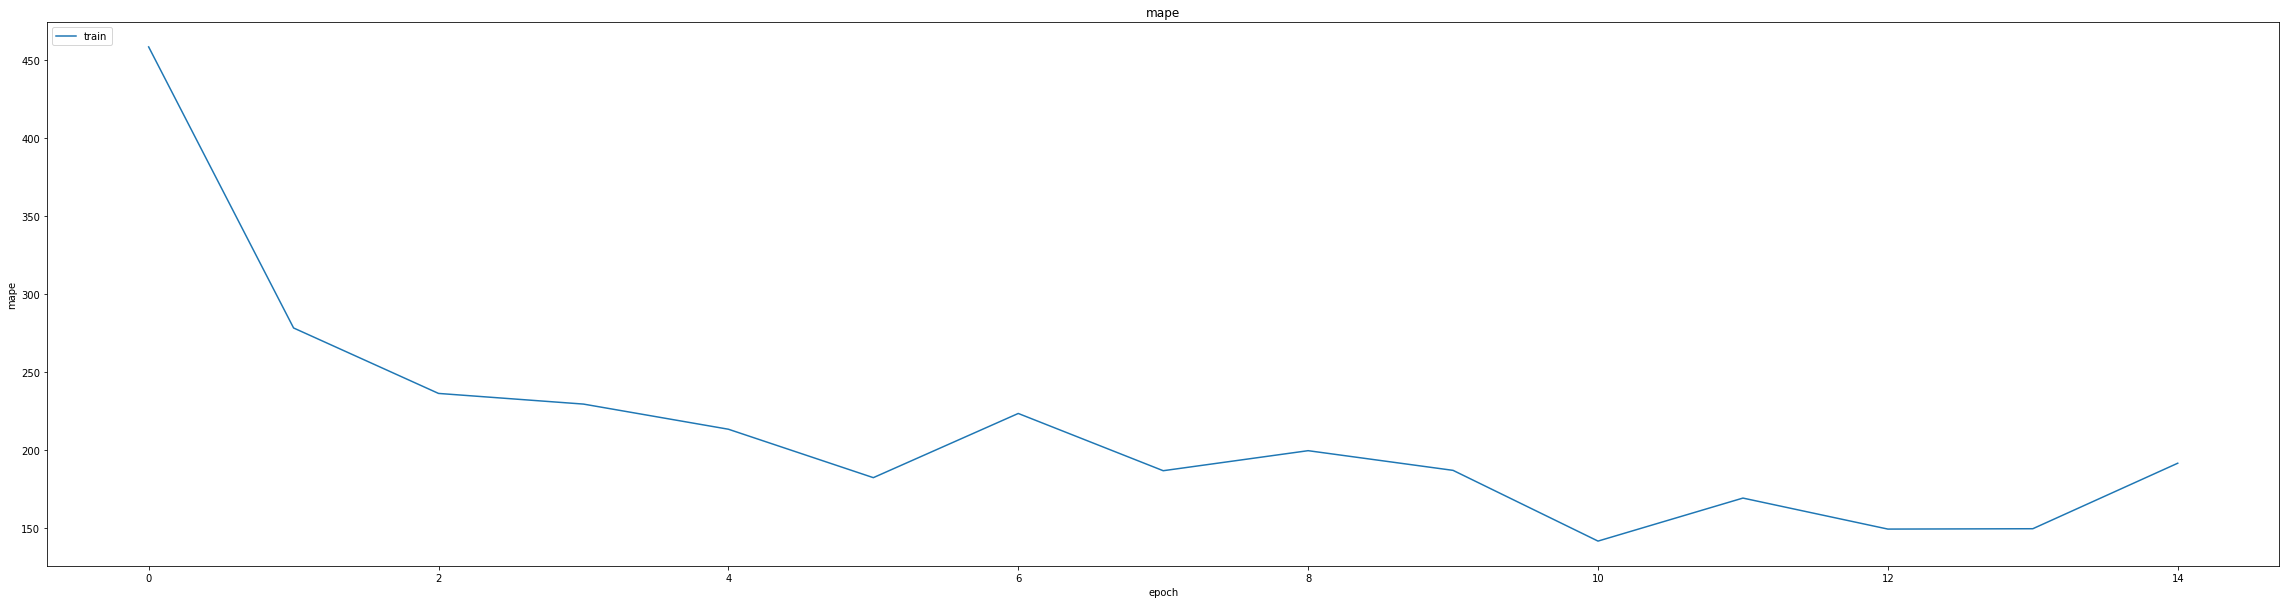

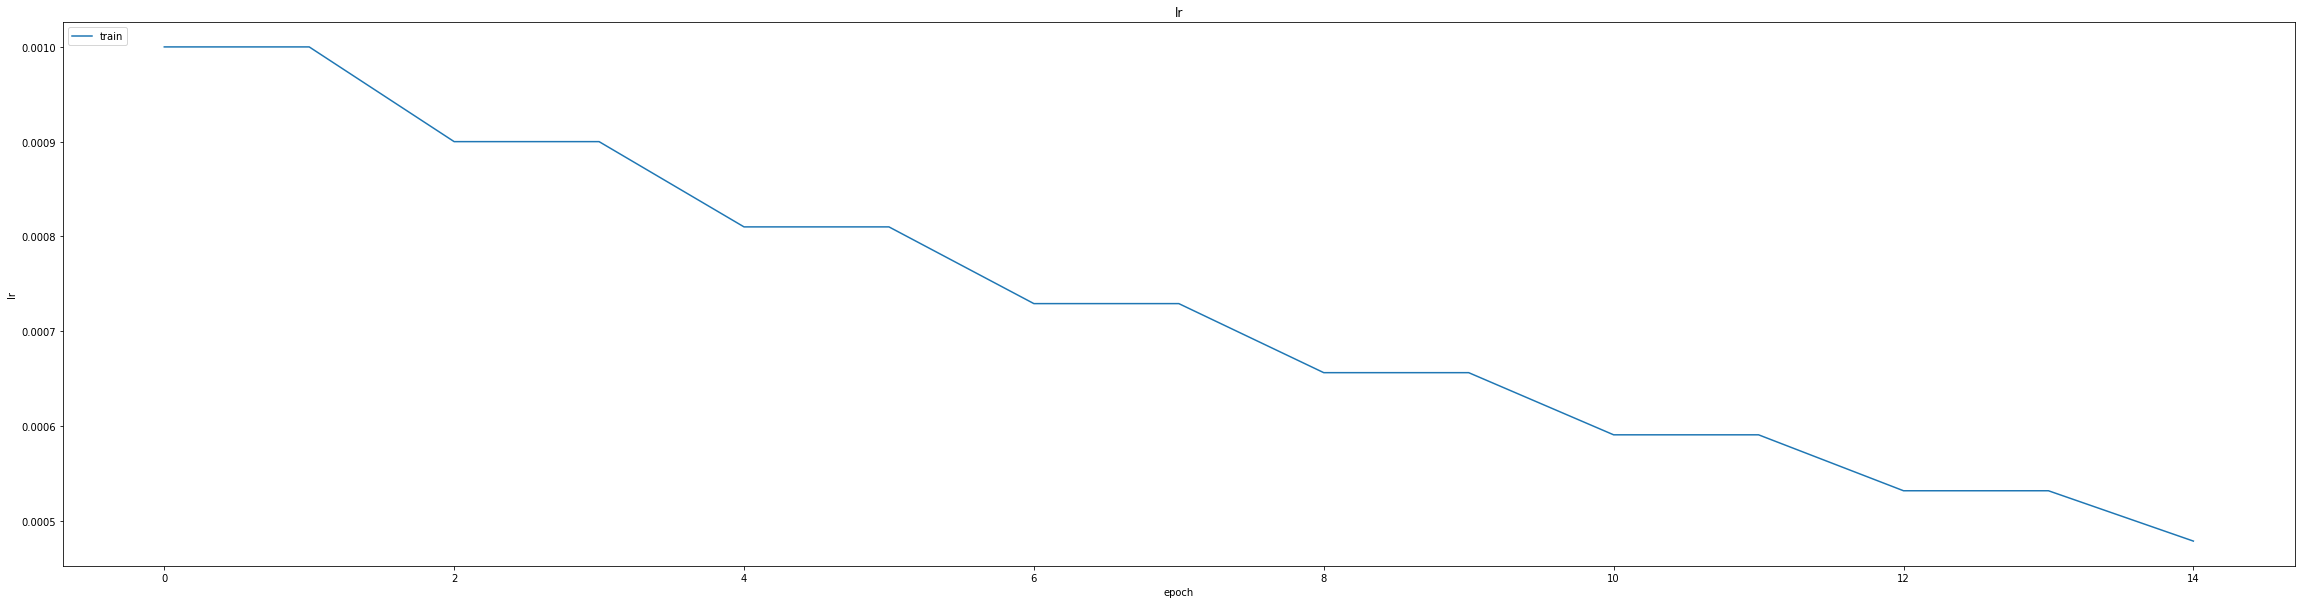

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:

print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.010168657638132572
0.012265296652913094
687/687 [==============================] - 36s 50ms/step
0.9855047293512801


In [ ]:
model.load_weights("weights.best.hdf5")

687/687 [==============================] - 28s 41ms/step


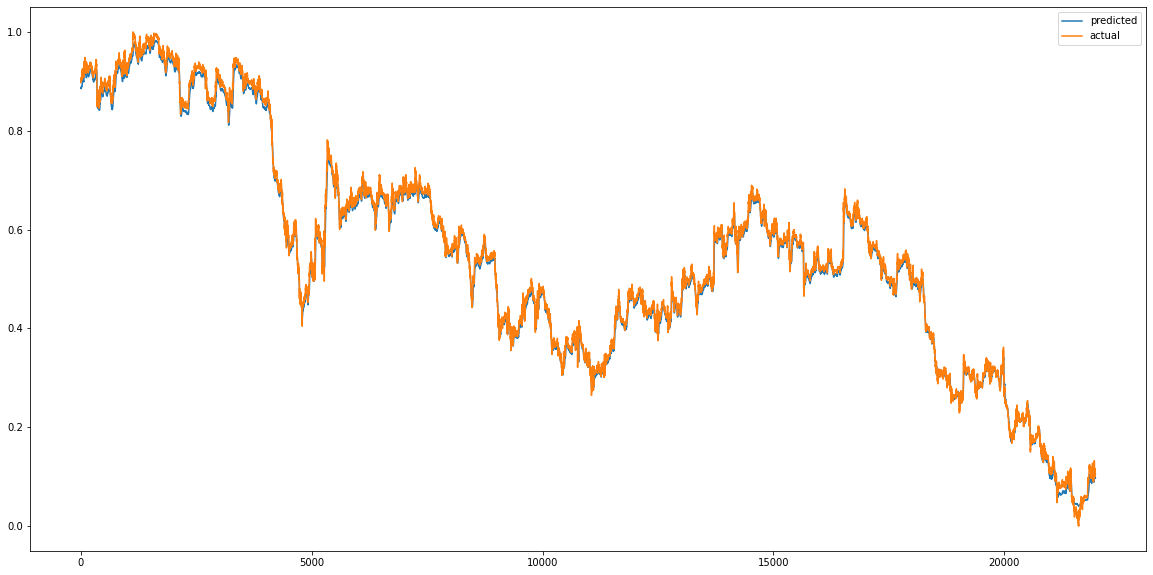

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


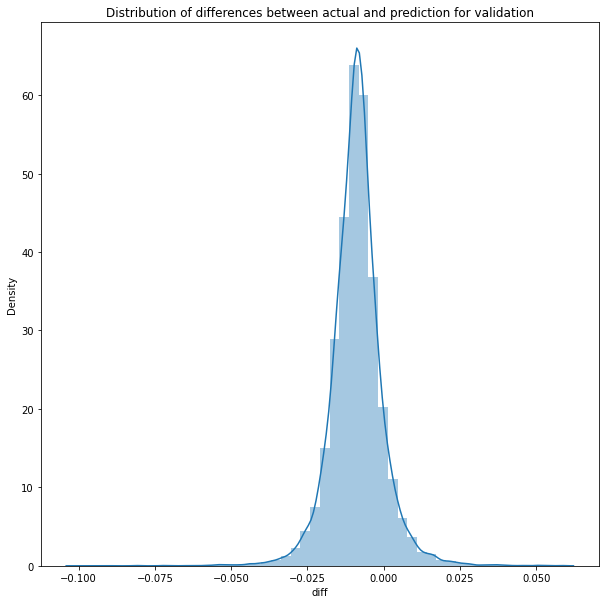

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 30s 42ms/step


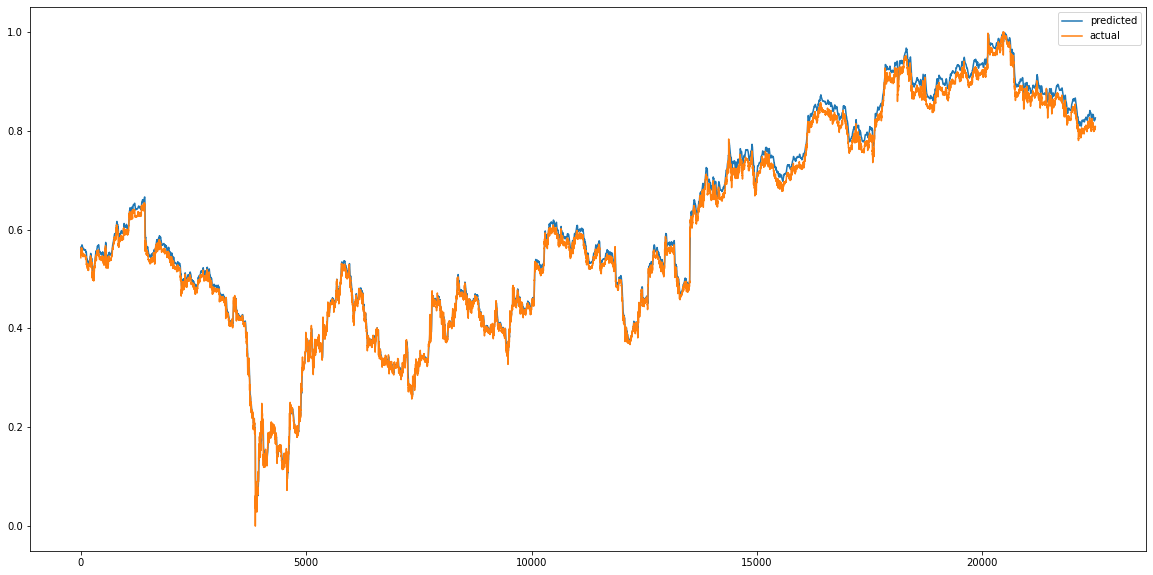

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


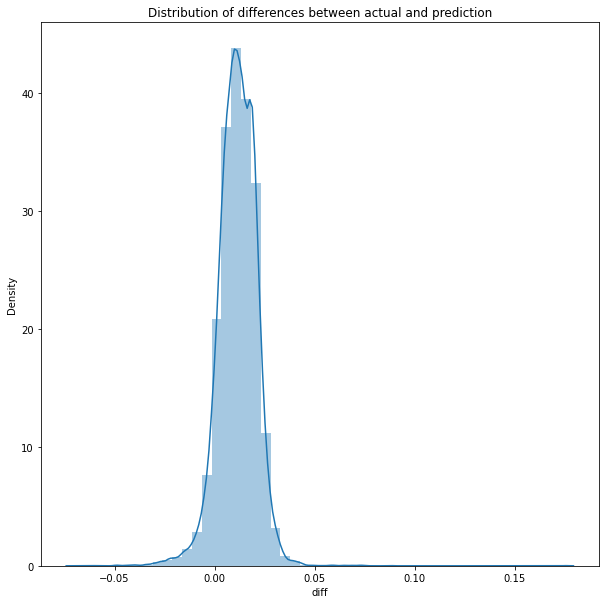

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.00021920128605497848
MAE :  0.012587827726833156
RMSE :  0.014805447850537263
704/704 [==============================] - 29s 41ms/step
R2_Score  : 0.9855047293512801


count    22508.000000
mean         0.011391
std          0.009457
min         -0.070383
25%          0.005693
50%          0.011619
75%          0.017851
max          0.175591
Name: diff, dtype: float64